# House Sales in King County, Washington
#
### Team Four - Katie Hu, Bryan Flores, Mayel Espino
##
---

## Objective
The objective of this study is to create a prediction analysis in forecasting the next quarter's house sale prices.

## Data Collection

Using Python via Jupyter Notebook and VS CODE, the data was imported as a .csv file with the final code inputted into DEEPNOTE for team collaboration.

## Data Importing


##### Import Support Libraries

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Dependencies
import pandas as pd
import numpy as np
from numpy import median
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

##### Import CSV File - House_Sales

In [2]:
house_sales = pd.read_csv('house_sales.csv') 

## Data Pre-Processing

Data pre-processing shows that the dataset has 21,613 rows of house sales with 21 columns of house features and information. A preview of the data is shown for initial visualization while the descriptive analysis shows the number of values listed for each variable, the mean, median, min, max, and more. The data types shows that all values are int64 or float64 with date being object.

From initial analysis, we can see the count in the descriptive analysis isn't uniform across all variables showing that there is missing data in this file. The code shows that the four variables missing values is ```sqft_living```, ```sqft_lot```, ```bedrooms```, and ```bathrooms```. The preview of the data also shows that the date isn't formatted correctly. These will be the items that will be tackled during the data cleaning.

In [3]:
 house_sales.shape #shape lists the number of rows and columns

(21613, 21)

In [4]:
house_sales.columns #listed columns in dataset

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
house_sales #preview of the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
house_sales.describe() #descriptive analysis

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
house_sales.isnull().sum() #count the number of missing rows by column

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
house_sales.dtypes #data types

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Data Cleaning

#### DATE 
The dataset will be assigned to a new variable to be worked on and modified throughout the rest of the code as ```house_clean```. To change the date to be easier to understand, Pandas is used to remove the extra characters while datetime is used to format the date with hyphens. The ```date``` is also then grouped into quarters for use in later analysis when determining future prices. 

In [9]:
#Create new dataframe to preserve original dataset and assign to new variable
house_clean = pd.DataFrame(data=house_sales)     
dates = house_clean["date"]
dates.head()

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

In [10]:
#Strip 'T000000' from date column and insert into housing sales dataframe
house_clean['date'] = pd.Series([date.strip('T000000') for date in dates], index=house_clean.index)
house_clean['date'].head()

0    20141013
1    20141209
2    20150225
3    20141209
4    20150218
Name: date, dtype: object

In [11]:
#Convert date column datatype from string to datetime and save to csv
import datetime as dt
house_clean[['date']] = house_clean[['date']].applymap(str).applymap(lambda s: '{}-{}-{}'.format(s[0:4],s[4:6],s[6:]))

In [12]:
house_clean.to_csv('house_clean_dates.csv')
house_clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
#Subset of house_clean dataframe for columns: date, price, zipcode, sqft_lot
zipQuarterDF = house_clean[['date','price','sqft_lot','zipcode']]
zipQuarterDF.head()

,date,price,sqft_lot,zipcode
0,2014-10-13,221900.0,5650.0,98178
1,2014-12-09,538000.0,7242.0,98125
2,2015-02-25,180000.0,10000.0,98028
3,2014-12-09,604000.0,5000.0,98136
4,2015-02-18,510000.0,8080.0,98074


In [14]:
zipQuarterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      21613 non-null  object 
 1   price     21613 non-null  float64
 2   sqft_lot  20569 non-null  float64
 3   zipcode   21613 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 675.5+ KB


In [15]:
#Order zipcode data by date.
zipQuarterDF = zipQuarterDF.sort_values(by=['date']).reset_index(drop=True)
zipQuarterDF.head()

,date,price,sqft_lot,zipcode
0,2014-05-02,437500.0,35100.0,98027
1,2014-05-02,790000.0,4750.0,98117
2,2014-05-02,675000.0,67518.0,98029
3,2014-05-02,555000.0,6500.0,98065
4,2014-05-02,440000.0,8119.0,98006


In [16]:
#Add lat-long columns
zipQuarterDF[['lat','long']] = house_clean[['lat','long']]

In [17]:
#Column of categorical data and save as csv.
zipQuarterDF['quarter'] = pd.to_datetime(zipQuarterDF['date']).dt.quarter
zipQuarterDF.to_csv('zip_by_quarter.csv')
zipQuarterDF.head()

,date,price,sqft_lot,zipcode,lat,long,quarter
0,2014-05-02,437500.0,35100.0,98027,47.5112,-122.257,2
1,2014-05-02,790000.0,4750.0,98117,47.7210,-122.319,2
2,2014-05-02,675000.0,67518.0,98029,47.7379,-122.233,2
3,2014-05-02,555000.0,6500.0,98065,47.5208,-122.393,2
4,2014-05-02,440000.0,8119.0,98006,47.6168,-122.045,2


In [18]:
#Average lot size by zipcode
avglot_zip = pd.Series(round(zipQuarterDF.groupby(['zipcode', 'quarter'])['sqft_lot'].mean(), 2))
print(avglot_zip)

zipcode  quarter
98001    1          12207.77
         2          13269.71
         3          17892.57
         4          16163.11
98002    1           7284.50
                      ...   
98198    4          10497.15
98199    1           5284.81
         2           5384.61
         3           5738.39
         4           5413.35
Name: sqft_lot, Length: 280, dtype: float64


#### Missing Values

##### SQFT_LIVING
For missing values, ```sqft_living``` has 1110 rows. After reviewing the dataset, ```sqft_living``` is equivalent to the sum of ```sqft_above``` and ```sqft_basement```. The code shows ```sqft_living``` missing values filled in using the sum for each row. 

In [19]:
sqft_living_total = house_clean['sqft_above'] + house_clean['sqft_basement']
house_clean['sqft_living'] = house_clean['sqft_living'].fillna(sqft_living_total, axis=0)

##### SQFT_LOT
For missing values, ```sqft_lot``` has 1044 rows. To find the missing values for ```sqft_lot```, ```sqft_lot15``` was used to get the average lot size of the 15 nearest houses and grouped by ```zipcode```. Then, the mean for that was taken so that it would give a more accurate value for the lot size. 

In [20]:
house_clean['sqft_lot'] = round(house_clean['sqft_lot'].fillna(house_clean.groupby('zipcode')['sqft_lot15'].transform('mean')),0)

##### BEDROOMS
The NAN values were changed to zero. Then, a regression model was used with ```bathrooms``` and ```sqft_living``` as the predictor variables to calculate ```bedrooms``` , the dependent variable.

Note: ```bathrooms``` and ```bedrooms``` can be interchanged as the dependent variable, with ```sqft_living``` always used as one of the predictor variables.

In [21]:
#Remove Outliers for Bedrooms and Bathrooms
house_clean.loc[(house_clean.bedrooms == 0) & (house_clean.bedrooms > 10), 'bedrooms'] = np.nan

In [22]:
house_clean['bedrooms'] = house_clean['bedrooms'].fillna(0)

In [23]:
y = house_clean.bedrooms
X = house_clean[['bathrooms','sqft_living']]
X = sm.add_constant(X)
lr_model = sm.OLS(y, X, missing='drop').fit()

In [24]:
house_clean['predict_bedrooms'] = round(lr_model.predict(X),0)

In [25]:
house_clean['bedrooms'] = house_clean['bedrooms'].fillna(house_clean['predict_bedrooms'], axis=0)

#### BATHROOMS
The NAN values were changed to zero. Then, a regression model was used with ```bedrooms``` and ```sqft_living``` as the predictor variables to calculate ```bathrooms``` , the dependent variable.

In [130]:
#Remove Outliers
house_clean.loc[(house_clean.bathrooms == 0), 'bathrooms'] = np.nan

In [131]:
house_clean['bathrooms'] = house_clean['bathrooms'].fillna(0)

In [132]:
y = house_clean.bathrooms
X = house_clean[['bedrooms','sqft_living']]
X = sm.add_constant(X)
lr_model = sm.OLS(y, X, missing='drop').fit()

In [133]:
house_clean['predict_bathrooms'] = round(lr_model.predict(X),1)

In [134]:
house_clean.loc[(house_clean.predict_bathrooms - np.fix(house_clean.predict_bathrooms)) != 0.5 , 'predict_bathrooms'] = round(house_clean.predict_bathrooms,0)

In [135]:
house_clean['bathrooms'] = house_clean['bathrooms'].fillna(house_clean['predict_bathrooms'], axis=0)

In [136]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              bathrooms   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                 1.521e+04
Date:                Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:39:50   Log-Likelihood:                -15170.
No. Observations:               21613   AIC:                         3.035e+04
Df Residuals:                   21610   BIC:                         3.037e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6127      0.013     48.099      

In [137]:
house_clean.to_csv('house_clean_bathroom.csv', index=False, header=True)

In [138]:
#No more missing values anymore
house_clean.isnull().sum()

Unnamed: 0           0
id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
quarter              0
price_range_int      0
price_range          0
predict_bathrooms    0
dtype: int64

#### Reduce Redundant Information

After analyzing the data and what is required for predicting house prices, the following variables were remove since the information is either redundant or not beneficial to keep.

In [35]:
#Remove unneeded columns
house_clean.drop(columns=['floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated'], axis = 1, inplace = True)

In [36]:
#Set Color Theme to Colorblind Friendly Colors
sns.set_palette("colorblind",13)
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## Relationships and Association

The following visualizations show pricing compared to various features. With having the price as the objective, that will be the dependent variable. The correlation heatmap shows the relationship between each feature to show . From that heatmap, the three strongest correlations are ```grade```, ```sqft_living```, and ```bathrooms```. There will be visualizations to show the association below as the independent variables.

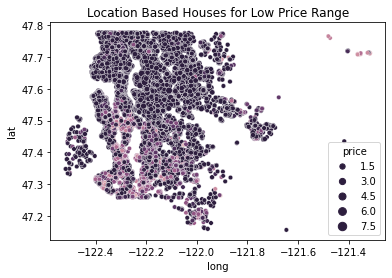

In [37]:
#Visualization of pricing
#This scatterplot shows the lower range from minimum of 75,000 to 350,000.
sns.scatterplot(data=house_clean, x="long", y="lat", hue="price", hue_norm=(75000,350000), size = "price")
plt.title(r'Location Based Houses for Low Price Range')
plt.savefig('Location Based Houses for Low.png')

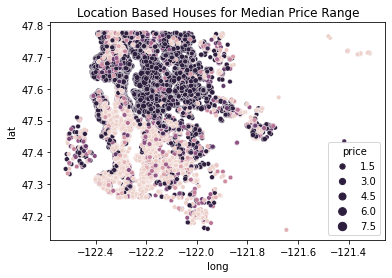

In [38]:
#This scatterplot shows the range from 350,000 to 550,000 with the median price being 450,000.
sns.scatterplot(data=house_clean, x="long", y="lat", hue="price", hue_norm=(350000,550000), size = "price")
plt.title(r'Location Based Houses for Median Price Range')
plt.savefig('Location Based Houses for Med.png')

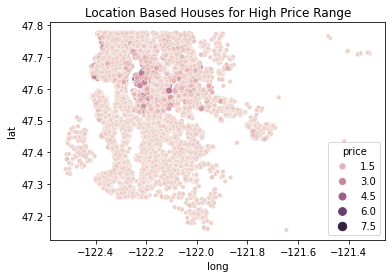

In [39]:
#This scatterplot shows the range from 550,000 to MAX
sns.scatterplot(data=house_clean, x="long", y="lat", hue="price", hue_norm=(550000,7700000), size = "price")
plt.title(r'Location Based Houses for High Price Range')
plt.savefig('Location Based Houses for High.png')

This histogram shows the relationship between ```price``` and the number of transactions. From this chart, it shows where the median of the house lies at $450,000.

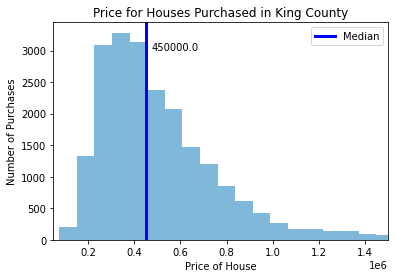

In [40]:
fig = plt.figure()
plt.hist(house_clean['price'], bins=100, alpha=.5)
plt.xlabel('Price of House')
plt.ylabel('Number of Purchases')
plt.xlim(50000,1500000)
plt.axvline(x=house_clean.price.median(), linewidth=3, color='blue', label="Median", alpha=1)
plt.text(475000,3000, house_clean.price.median() ,rotation=0)
plt.title(r'Price for Houses Purchased in King County')
legend = ['Median']
plt.legend(legend)
plt.show()

### Correlation Matrix

This correlation matrix shows the relationship between each house feature. From this matrix, ```sqft_living```, ```grade```, and ```bathrooms``` have the strongest relationship to price. With that, these are the three variables that will be moving forward with in predicting future price. 

price ~ sqft_living **0.7**

price ~ grade **0.67**

price ~ bathrooms **0.52**

Text(0.5, 1.0, 'Correlation Matrix')

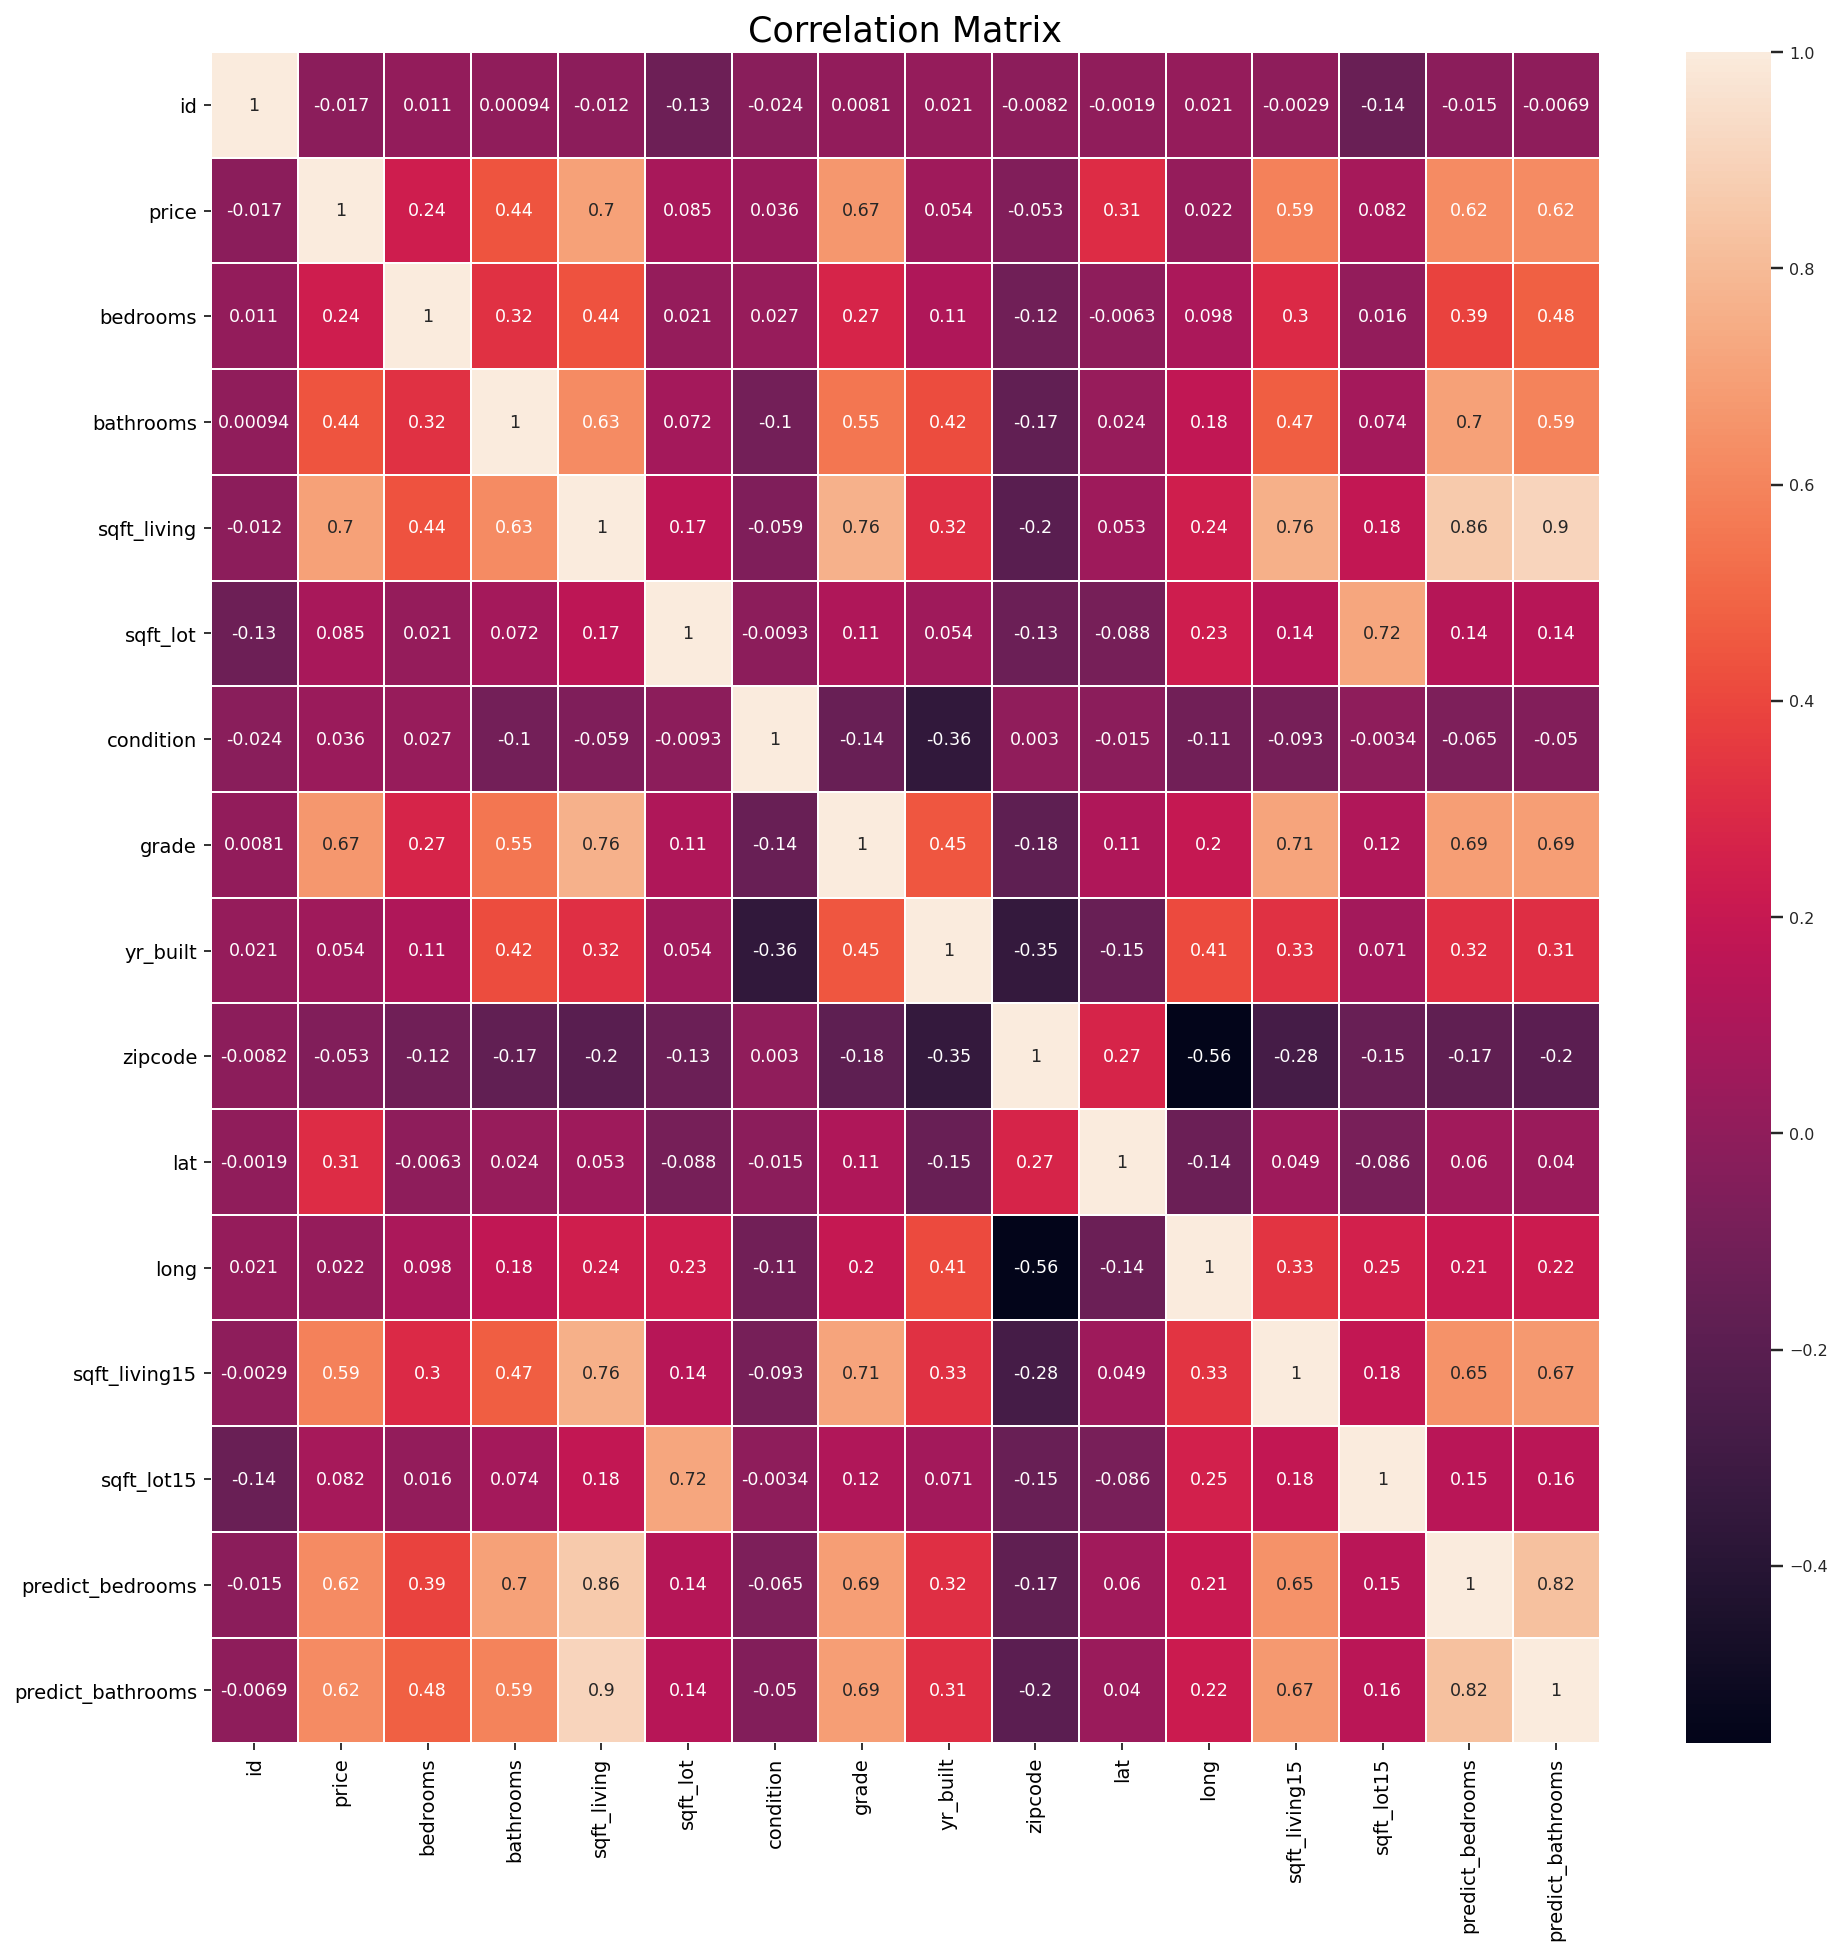

In [41]:
corrMatrix = house_clean.corr()
plt.subplots(figsize=(16,16), dpi=140)
sns.set(font_scale=.75)
sns.heatmap(corrMatrix, annot=True, linewidths=1)
plt.title(r'Correlation Matrix', fontsize=18)

### Grade

This graph shows the measures of centrality of ```grade``` with the median and mean line listed. The median lies at 7 and the mean falls to the right of the median. Therfore, there is a positive skew distribution.

Text(0.5, 1.0, 'Centrality for Grade')

<Figure size 720x576 with 0 Axes>

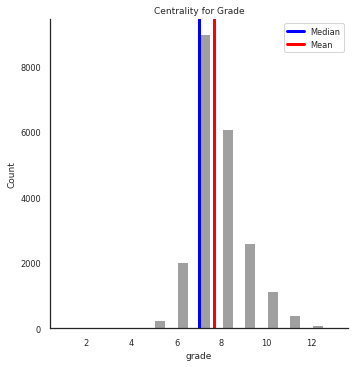

In [42]:
# Plot Size
Size = plt.figure()
Size.set_figwidth(10)
Size.set_figheight(8)
sns.set_style("white")

#Plot Histogram
Central_Grade = sns.displot(house_clean["grade"], kde=False, binwidth=.5, color = 'grey')
plt.axvline(x=house_clean.grade.median(), linewidth=3, color='blue', label="median", alpha=1)
plt.axvline(x=house_clean.grade.mean(), linewidth=3, color='red', label="mean", alpha=1)
plt.legend(['Median', 'Mean'])
plt.title("Centrality for Grade")

This shows the association between ```grade``` and ```price```. The chart shows that as the ```grade``` increases, the ```price``` increases as well which shows that there is a direct relationship.

Text(0.5, 1.0, 'Relationship Between Grade and Price')

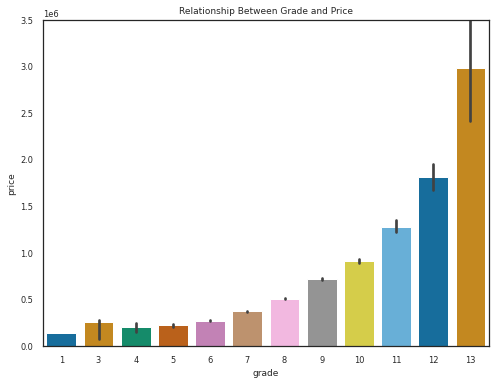

In [43]:
# Plot Size and Color
sns.set_palette("colorblind",13)
Size = plt.figure()
Size.set_figwidth(8)
Size.set_figheight(6)
sns.set_style("white")

#Association between grade and price
Central = sns.barplot(x="grade", y="price", data=house_clean, estimator = median)

plt.ylim(0,3.5e6)
plt.title("Relationship Between Grade and Price")

### Bathrooms

This is a two dimensional (bivariate) density plot that shows three density clusters. The density clusters are focused around 1, 1.75 and 2 ```bathrooms```. That shows that as prices change, these are the three most common number of ```bathrooms``` for houses.

Text(0.5, 1.0, ' Density Plot for Bathroom')

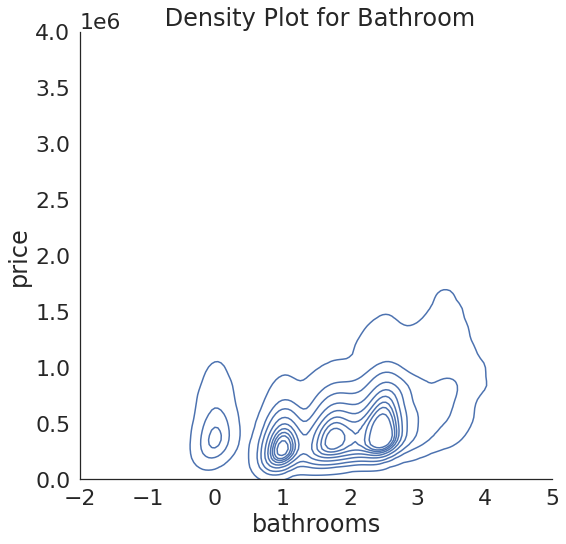

In [44]:
#Bivariate density plot

#Plot Set Up
sns.set(font_scale=2)
sns.set_style("white")

sns.displot(house_clean, x="bathrooms", y="price", kind="kde", height=8)
plt.ylim(0,4e6)
plt.xlim(-2,5)
plt.title(r' Density Plot for Bathroom')

### Sqft Living

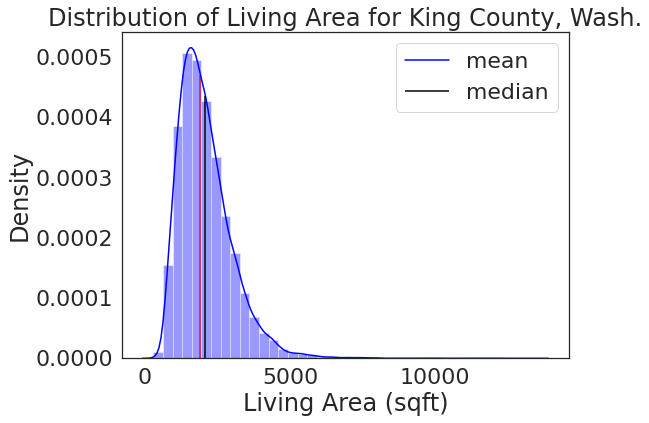

In [45]:
Size=plt.figure()
Size.set_figwidth(8)
Size.set_figheight(6)
x_ax = house_clean['sqft_living']
sqftliv_dist = sns.distplot(x_ax, bins=40, color='blue')

sns.set_style("white")


# Measures of centrality: mean and median
mean = x_ax.mean()
median = x_ax.median()

# Setting parameters for mean line
kdeline = sqftliv_dist.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

# Height of mean and median lines
mean_ht = np.interp(mean, xs, ys)
median_ht = np.interp(median, xs, ys)

# Plotting the mean and median
sqftliv_dist.vlines(mean, 0, mean_ht, color='black')
sqftliv_dist.vlines(median, 0, median_ht, color='crimson')

# Title, Legend, and Axis Labels
plt.title("Distribution of Living Area for King County, Wash.")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Density")
plt.legend(['mean','median'])
plt.savefig('LivingAreaDist.png')
plt.show()

In [46]:
house_clean = pd.read_csv('houseClean_dates.csv') 

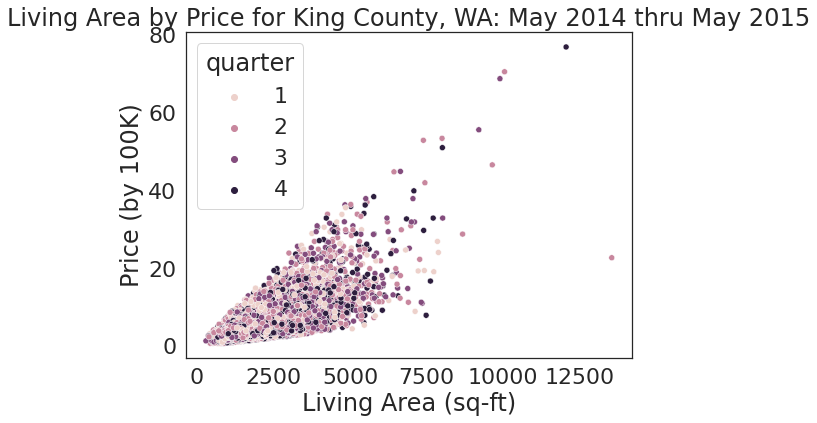

In [47]:
#Scatterplot of the Living area and Price.
Size=plt.figure()
Size.set_figwidth(8)
Size.set_figheight(6)
sns.set_style("white")

X = house_clean['sqft_living']
y = house_clean['price']/100000
sns.scatterplot(data=house_clean, x=X, y=y, hue="quarter")

plt.title('Living Area by Price for King County, WA: May 2014 thru May 2015')
plt.xlabel('Living Area (sq-ft)')
plt.ylabel('Price (by 100K)')
plt.savefig('LivingAreaPriceScatter.png')
plt.show()

#### Pairplot Comparison of Three Highest Correlated House Features

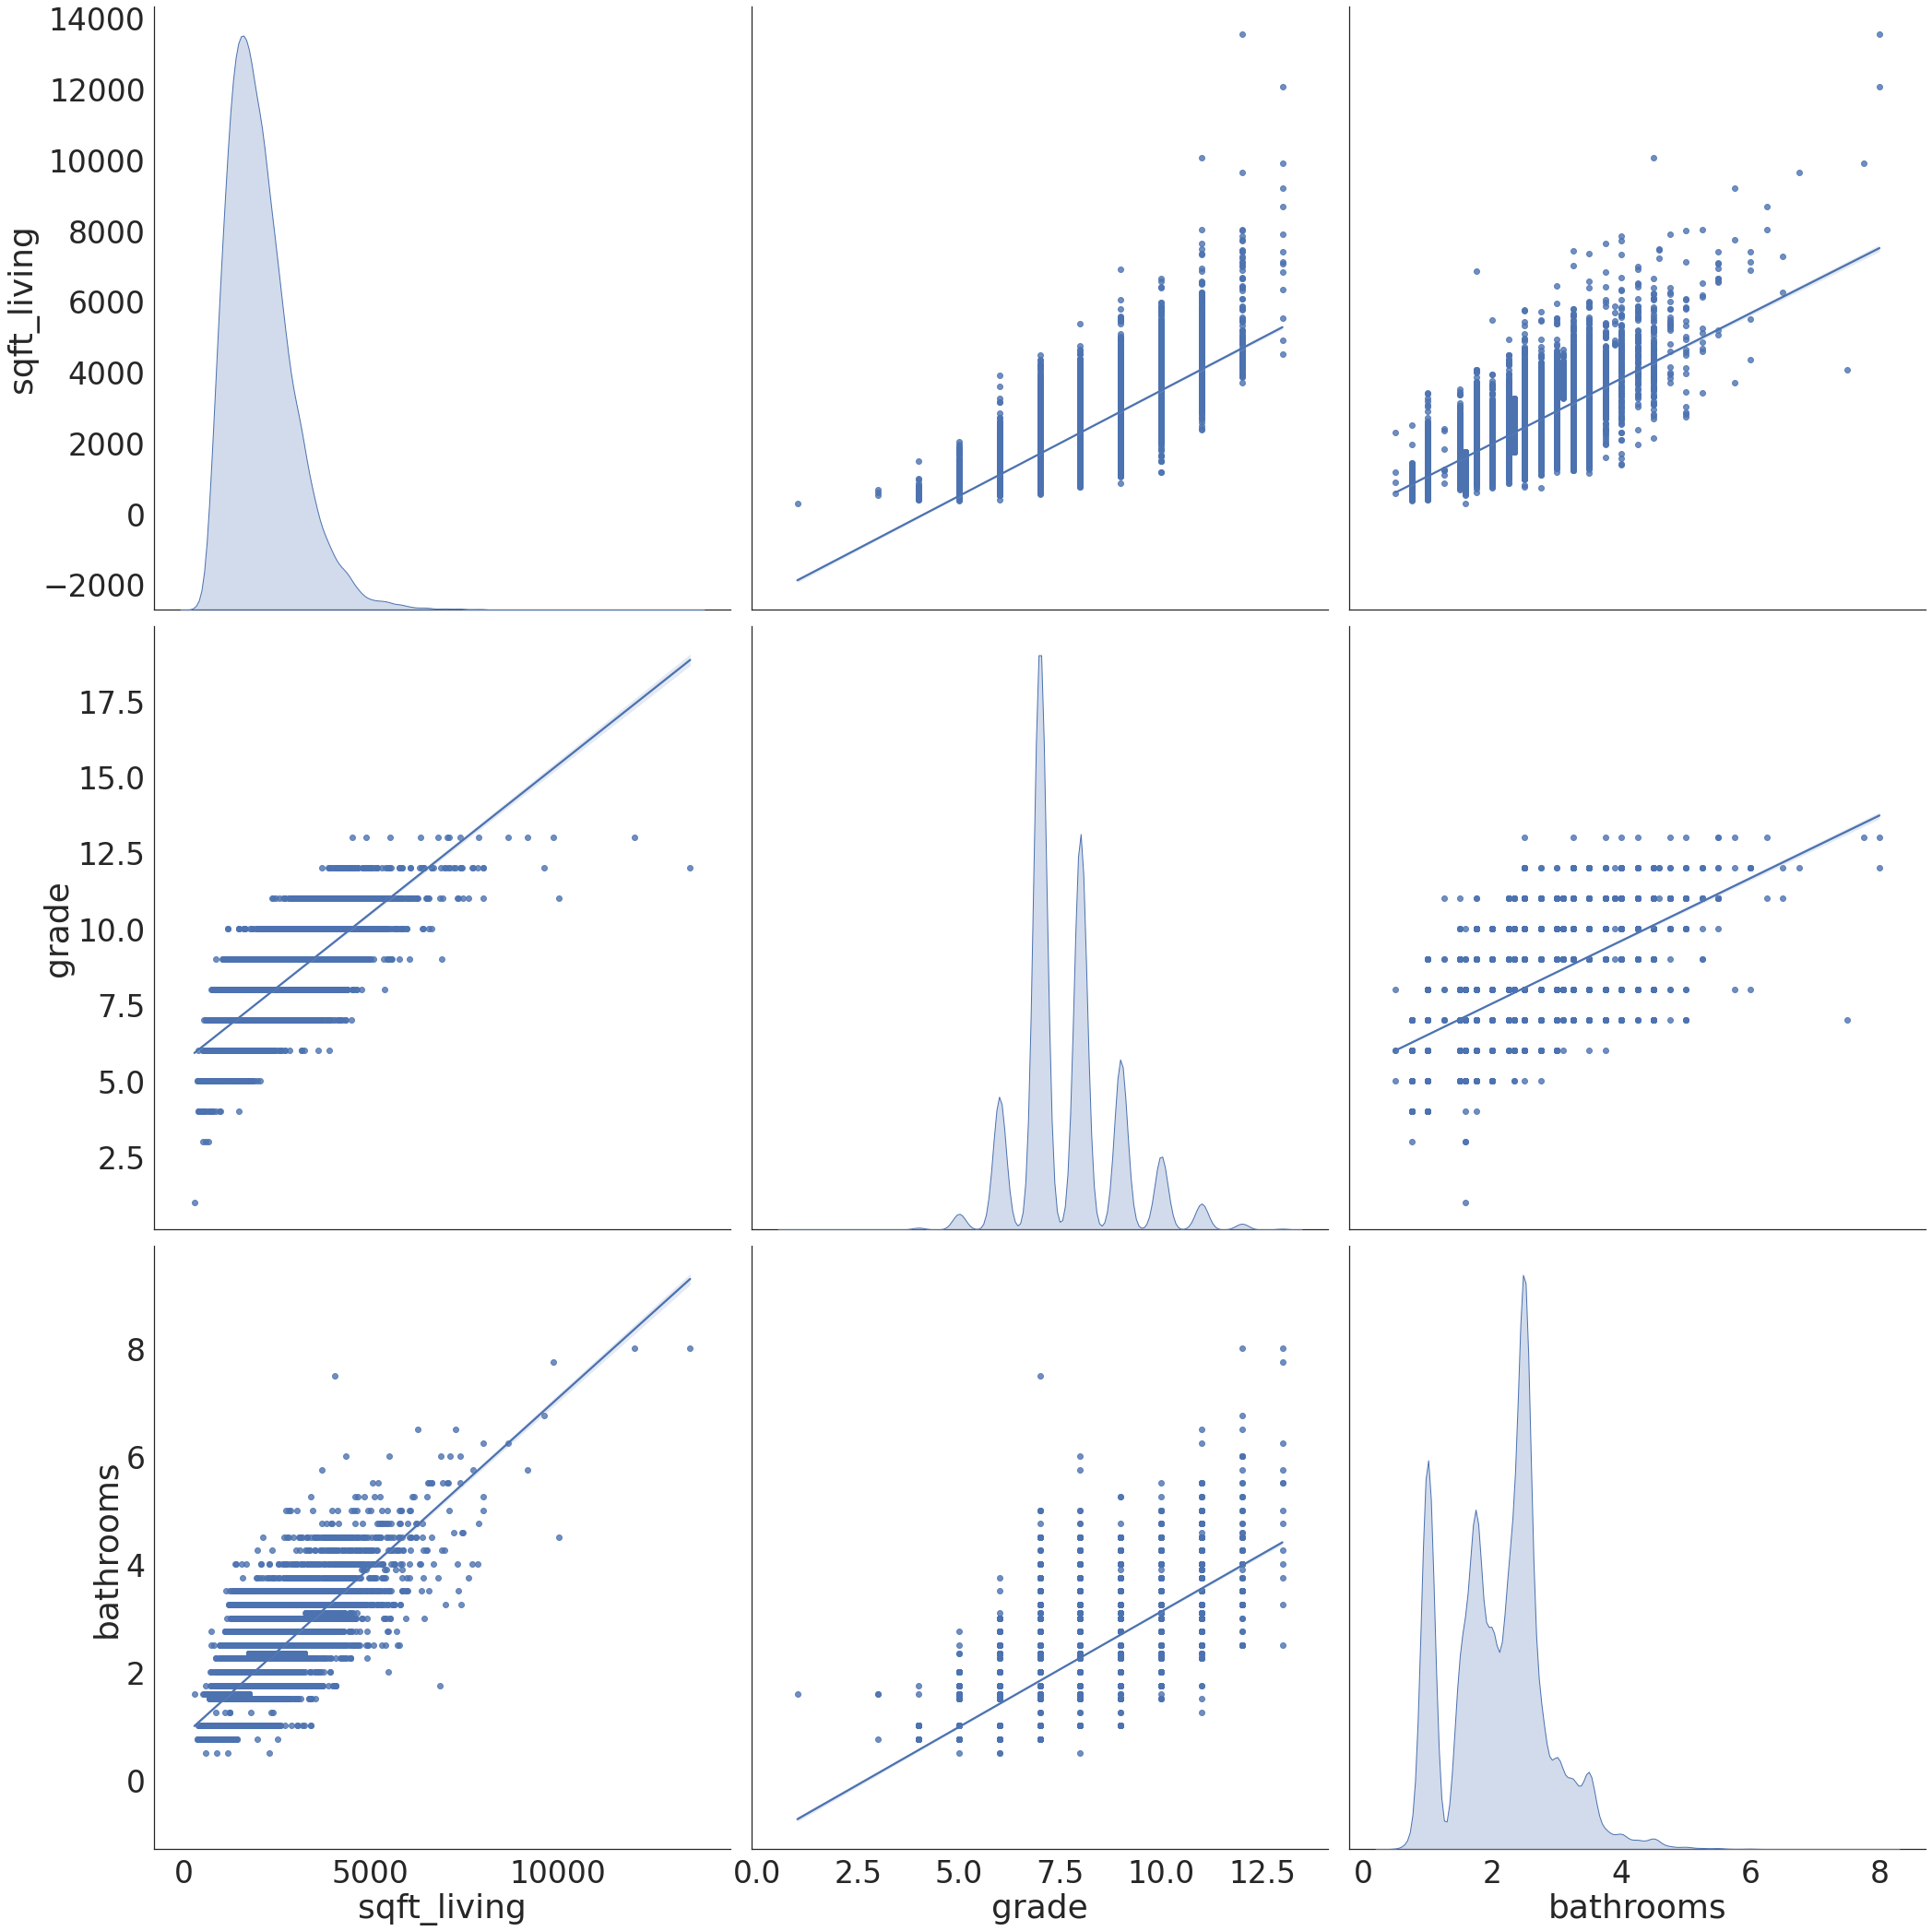

In [48]:
#Set Parameters
sns.set_style("white")
sns.set_context("notebook" , font_scale=3)

#Plot 
sns.pairplot(house_clean, vars=['sqft_living', 'grade', 'bathrooms'], height=10, diag_kind='kde', kind='reg')

In [49]:
corr = house_clean[['price','bathrooms','sqft_living','grade']].corr()
corr.style.background_gradient(cmap='Set2').set_precision(2)

,price,bathrooms,sqft_living,grade
price,1.00,0.53,0.70,0.67
bathrooms,0.53,1.00,0.76,0.66
sqft_living,0.70,0.76,1.00,0.76
grade,0.67,0.66,0.76,1.00


## Data Analysis

For this dataset and objective, it will be a supervised learning. There are no missing values and both ```price``` and predictor variables are given to make it a supervised learning since the data can be trained. ```Price``` is the dependent variable with ```bathrooms```, ```sqft_living```, and ```grade``` as the independent variables. 

### Train for Linear Regression Analysis

In [50]:
X_train_df = house_clean[['bedrooms','sqft_living','grade']]
y_train_df = house_clean['price']
X_train_df.head()

,bedrooms,sqft_living,grade
0,3.0,1180.0,7
1,3.0,2570.0,7
2,2.0,770.0,6
3,4.0,1960.0,7
4,3.0,1680.0,8


In [51]:
#Define Dependent and Independent Variables
X = X_train_df.iloc[:, 0:3].values
y = y_train_df.values.reshape(-1,1)
print(X.shape, y.shape)

(21613, 3) (21613, 1)


In [52]:
#Create Training and Test sets with a 70-30 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15129, 3) (6484, 3) (15129, 1) (6484, 1)


In [53]:
#Inspect feature training set
X_train

array([[4.00e+00, 2.68e+03, 9.00e+00],
       [4.00e+00, 2.34e+03, 7.00e+00],
       [4.00e+00, 2.19e+03, 8.00e+00],
       ...,
       [3.00e+00, 2.12e+03, 7.00e+00],
       [1.00e+00, 3.80e+02, 5.00e+00],
       [4.00e+00, 3.13e+03, 7.00e+00]])

In [54]:
#Inspect feature output training set
y_train

array([[807100.],
       [570000.],
       [320000.],
       ...,
       [575000.],
       [245000.],
       [315000.]])

### Linear Regression Analysis

In [55]:
#Linear Regression using Sci-kit Learn
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

In [56]:
#Fit model to training data and calculate scores for the training and test sets
linreg.fit(X_train, y_train)
train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)

print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"Intercept: {linreg.intercept_}")
print(f"Coefficients: {linreg.coef_}")

Training Score: 0.5447804988010514
Test Score: 0.5346784002302888
Intercept: [-456625.2392444]
Coefficients: [[-41061.83765057    215.19728087  89734.75088002]]


Text(0.5, 1.0, 'Residual Plot')

<Figure size 432x288 with 0 Axes>

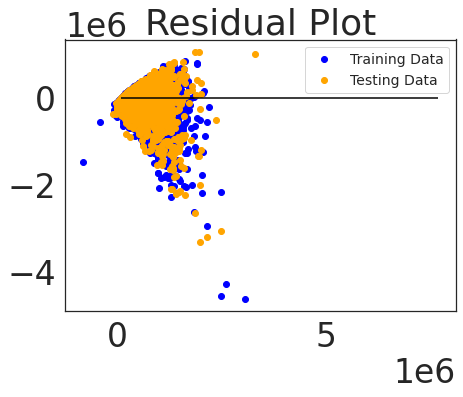

In [57]:
#Plot the Residuals for the Training and Testing data
fig = plt.figure()
plt.subplots(figsize=(7, 5))
plt.scatter(linreg.predict(X_train), linreg.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(linreg.predict(X_test), linreg.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend(fontsize=14, loc='upper right')
plt.hlines(y=0, xmin=y.min(), xmax=y.max(), color='black')
plt.title("Residual Plot")

In [58]:
# Make prediction
new_bedroom = 3
new_sqftliving = 2500
new_grade = 6
print(f"Predicted Price of Home: {linreg.predict([[new_bedroom, new_sqftliving, new_grade]])}")

Predicted Price of Home: [[496590.95524863]]


In [59]:
# Add constant
X = sm.add_constant(X)

model_fin = sm.OLS(y, X).fit()
predictions = model_fin.predict(X)

# Model summary
model_summary = model_fin.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     8512.
Date:                Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:33:47   Log-Likelihood:            -2.9917e+05
No. Observations:               21613   AIC:                         5.984e+05
Df Residuals:                   21609   BIC:                         5.984e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.715e+05   1.49e+04    -31.666      0.0

In [106]:
mean = np.ones(X_train.shape[1])
std = np.ones(X_train.shape[1])

for i in range(0, X_train.shape[1]):
    mean[i] = np.mean(X_train.transpose()[i])
    std[i] = np.std(X_train.transpose()[i])
    for j in range(0, X_train.shape[0]):
        X_train[j][i] = (X_train[j][i] - mean[i])/std[i]

In [107]:
print(f"Mean values: {mean} \n Standard Deviations: {std}")

Mean values: [ 1.93967975e-16  1.37139585e-16 -2.28018044e-16] 
 Standard Deviations: [1. 1. 1.]


#### Linear Regression Results

Based on the summary, the standard errors are high and the R-Squared value is average. These values signify that the regression isn't strong enough to create an accurate prediction analysis. From this, a gradient descent regression analysis was performed to find a better outcome.

### Batch Gradient Descent for Linear Regression

In [108]:
#Transform input variables from dataframe to array object
X = house_clean[['bedrooms','sqft_living','grade']].values

#Add bias column to input vector
X = np.concatenate((np.ones((len(X), 1)), X), axis=1)

#Feature Scaling for Full Set
min_x = np.min(X[:, 1:])
max_x = np.max(X[:, 1:])
X[:, 1:] = (X[:, 1:] - min_x)/(max_x - min_x)
print(X.shape, X[:10, :])

(21613, 4) [[1.00000000e+00 2.21565731e-04 8.71491876e-02 5.16986706e-04]
 [1.00000000e+00 2.21565731e-04 1.89807976e-01 5.16986706e-04]
 [1.00000000e+00 1.47710487e-04 5.68685377e-02 4.43131462e-04]
 [1.00000000e+00 2.95420975e-04 1.44756278e-01 5.16986706e-04]
 [1.00000000e+00 2.21565731e-04 1.24076809e-01 5.90841950e-04]
 [1.00000000e+00 2.95420975e-04 4.00295421e-01 8.12407681e-04]
 [1.00000000e+00 2.21565731e-04 1.26661743e-01 5.16986706e-04]
 [1.00000000e+00 2.21565731e-04 7.82865583e-02 5.16986706e-04]
 [1.00000000e+00 2.21565731e-04 1.31462334e-01 5.16986706e-04]
 [1.00000000e+00 2.21565731e-04 1.39586411e-01 5.16986706e-04]]


In [109]:
#Transform output variable from dataframe to array object
y = house_clean['price'].values.reshape(-1,1)
m = len(y)

#Feature Scaling for Output variable
max_y = np.max(y)
min_y = np.min(y)
y_normal = (y - min_y)/(max_y - min_y) 
y_normal[:10, 0]

array([0.01926557, 0.06072131, 0.01377049, 0.06937705, 0.05704918,
       0.15081967, 0.02393443, 0.02843934, 0.0202623 , 0.03252459])

<Figure size 864x504 with 0 Axes>

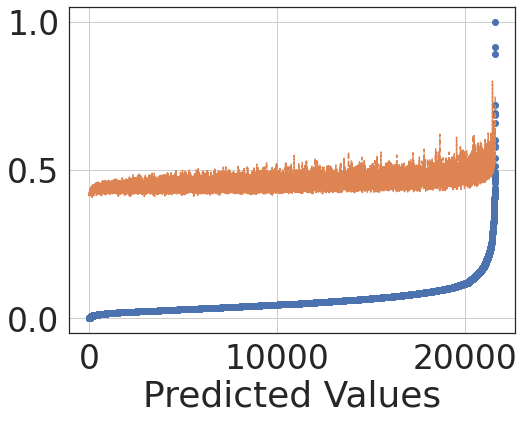

In [121]:
#plt.setup
fig = plt.figure()
plt.subplots(figsize=(8, 6))

# Initial estimate of parameters
theta0 = np.zeros((X.shape[1],1))+0.4
ypred = X.dot(theta0)

# sort the values for better visualization
index_sort = np.argsort(y_normal[:, 0]) 
plt.plot(y_normal[index_sort, 0], 'o')
plt.plot(ypred[index_sort, 0], '--')

# plt.title()
plt.xlabel("Predicted Values")

# plt.ylabel()
plt.grid()
plt.show()

The gradient of the cost function, 

$\partial\theta_j = (2/m) \sum(h_\theta x^{(i)} - y^{(i)})*x^{(i)}$

The following function computes all partial derivatives at once, and the resultant output is a parameter vector containing a bias term along with each feature: bedrooms, living area, and grade. 

In [122]:
#Gradient of the Cost Function Calculation
def grad_cost(theta):
    #dJ is the partial derivative of each mean-squared error with respect to all thetas
    dJ = (2/m) * np.sum((X.dot(theta) - y_normal) * X, axis=0).reshape(-1,1)
    return dJ

In [123]:
grad_cost(theta0)

array([[8.01551215e-01],
       [2.00422105e-04],
       [1.22228531e-01],
       [4.51298696e-04]])

The Mean Square Error (MSE) cost Function, which is given by 

$\theta_j = 1/m \sum(\theta^Tx^{(i)}-y^{(i)})^2$

The cost function provides the sum of the squared errors. 

In [124]:
#MSE Cost Function for a Linear Regression Model
def cost(theta):
    #J is the mean squared error cost function
    J = np.sum((X.dot(theta) - y_normal)**2, axis=0)[0]
    return J

In [125]:
cost(theta0)

3497.856994392184

The function, batch_grad, implements the batch gradient descent on our data set at each gradient step. The gradient steps are calculated by subtracting the MSE gradient that is multiplied by the learning rate.

The following function accepts the theta vector, the learning rate, the number of iterations, and the tolerance. The function then computes the gradients of the cost function and the cost for each iteration. 

In [126]:
def batch_grad(theta0, eta, n_iters, TOL=1e-7):
    
    theta_history = [theta0]
    J_history = [cost(theta0)]
    
    theta_new = theta0 * n_iters
    print(f'epoch \t Cost(J) \t')
    
    for epoch in range(n_iters):
        if epoch%100 == 0:
            print(f'{epoch:5d}\t{J_history[-1]:7.4f}\t')
        dJ = grad_cost(theta0)
        J = cost(theta0)
        
        theta_new = theta0 - (eta * dJ)
        theta_history.append(theta_new)
        J_history.append(J)
        
        if np.sum((theta_new - theta0)**2) < TOL:
            print('Convergence achieved.')
            break
        theta0 = theta_new

    return theta_new, theta_history, J_history

Verify the cost function given an initial theta vector. The output is the number of epochs required for the cost function to converge.

In [127]:
# theta, theta_history, J_history

theta, theta_history, J_history = batch_grad(theta0, 0.02, 1000)


epoch 	 Cost(J) 	
    0	3497.8570	
Convergence achieved.


Plot the cost function and the required number of iterations (epochs) for convergence.

Text(0, 0.5, 'Cost')

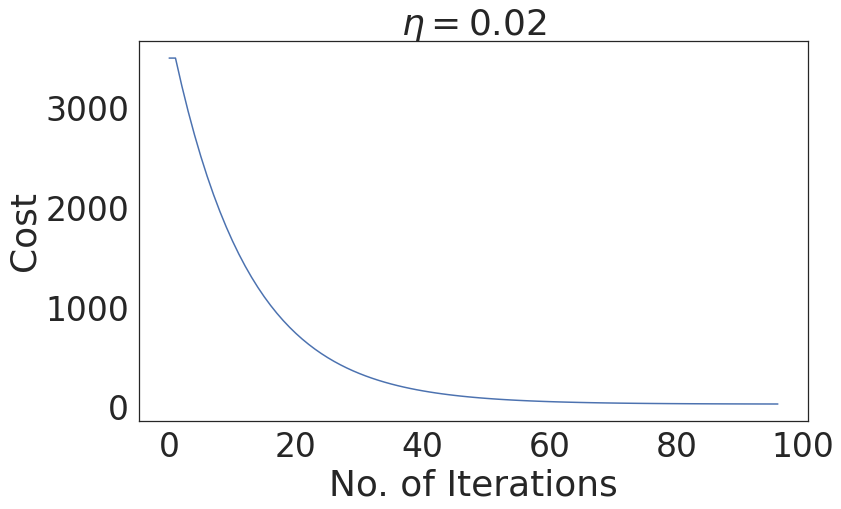

In [128]:
plt.plot(J_history)
plt.title("$\eta={0.02}$")
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")

Plot of the sorted predicted output vector over the output vector.

Text(0.5, 0, 'Original vs Predicted Housing Prices')

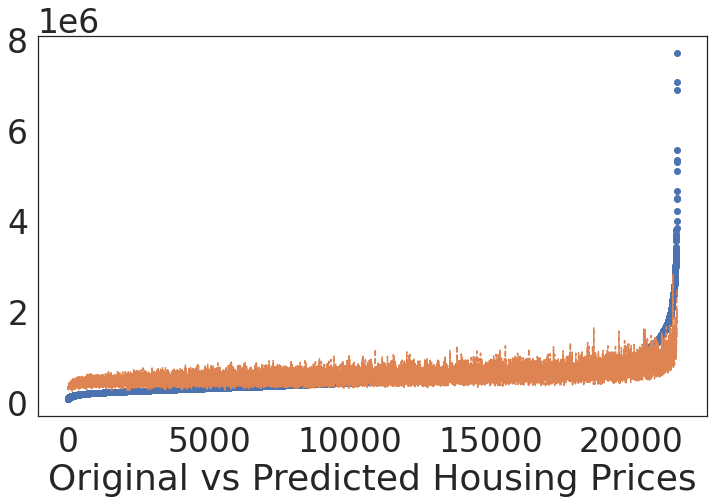

In [129]:
y_predict = X.dot(theta)

ypred = y_predict * (max_y - min_y) + min_y
plt.plot(y[index_sort, 0], 'o')
plt.plot(ypred[index_sort, 0], '--')
plt.xlabel("Original vs Predicted Housing Prices")

The following cell plots computes the batch gradient descent for 6 different learning rates $\eta$: 0.005, 0.01, 0.02, 0.05, 0.10, and 0.15. The results cost functions are then plotted to visualize the optimal learning rate.

epoch 	 Cost(J) 	
    0	3497.8570	
  100	480.2473	
  200	85.6211	
Convergence achieved.
epoch 	 Cost(J) 	
    0	3497.8570	
  100	85.5865	
Convergence achieved.
epoch 	 Cost(J) 	
    0	3497.8570	
Convergence achieved.
epoch 	 Cost(J) 	
    0	3497.8570	
Convergence achieved.
epoch 	 Cost(J) 	
    0	3497.8570	
Convergence achieved.
epoch 	 Cost(J) 	
    0	3497.8570	
Convergence achieved.


<Figure size 864x504 with 0 Axes>

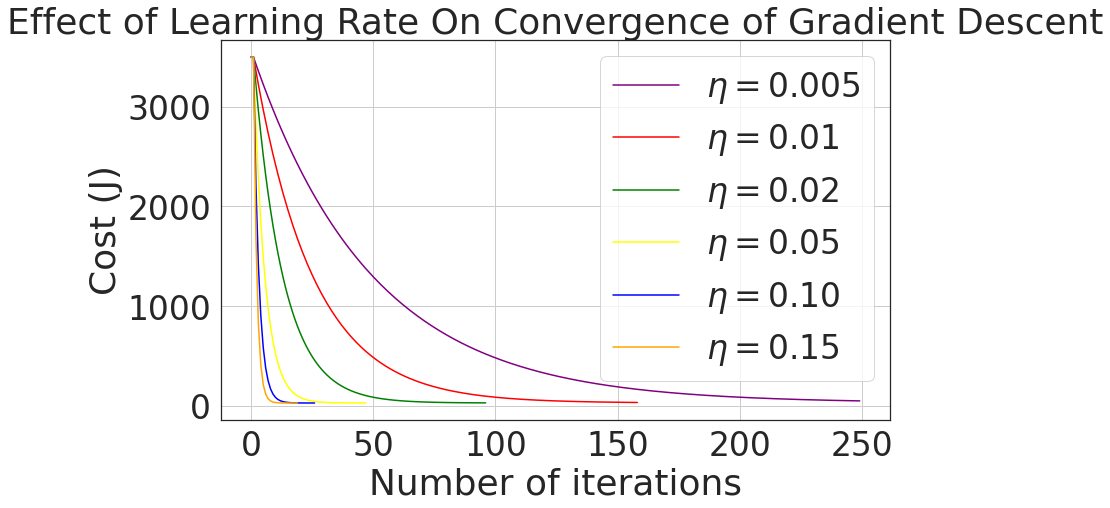

In [119]:
#Plot Learning Rates
n_iters = 1000
theta = np.zeros(X.shape[1])

eta = 0.005;
theta_1, theta_history_1, J_history_1 = batch_grad(theta0, eta, n_iters)

eta = 0.01;
theta_2, theta_history_2, J_history_2 = batch_grad(theta0, eta, n_iters)

eta = 0.02;
theta_3, theta_history_3, J_history_3 = batch_grad(theta0, eta, n_iters)

eta = 0.05;
theta_4, theta_history_4, J_history_4 = batch_grad(theta0, eta, n_iters)

eta = 0.10;
theta_5, theta_history_5, J_history_5 = batch_grad(theta0, eta, n_iters)

eta = 0.15;
theta_6, theta_history_6, J_history_6 = batch_grad(theta0, eta, n_iters)

fig = plt.figure()
plt.subplots(figsize=(12, 7))
plt.rcParams["figure.figsize"] = (12,7)
plt.plot(J_history_1, color ='purple', label = '$\eta = {0.005}$')
plt.plot(J_history_2, color ='red', label = '$\eta = {0.01}$')
plt.plot(J_history_3, color ='green', label = '$\eta = {0.02}$')
plt.plot(J_history_4, color ='yellow', label = '$\eta = {0.05}$')
plt.plot(J_history_5, color ='blue', label = '$\eta = {0.10}$')
plt.plot(J_history_6, color ='orange', label = '$\eta = {0.15}$')

plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()
plt.savefig('BGD_LearningRates.png')

Function to calculate the predicted housing prices.

In [74]:
def predict(x, theta):
    x_normal = (x - min_x)/(max_x - min_x)
    y_predict = x_normal.dot(theta)
    ypred = y_predict * (max_y - min_y) + min_y
    return ypred

In [75]:
#Inputs for Prediction Function
x1 = np.array([1, 1, 900, 7])
x2 = np.array([1, 2, 1400, 7])
x3 = np.array([1, 3, 1850, 7])
x4 = np.array([1, 4, 2400, 7])

In [76]:
# Provides Predicted Housing Price for a Learning Rate Value of 0.15
inputs = [x1, x2, x3, x4]
price_pred = []
for input in inputs:
    prices = predict(input, theta_6).tolist()
    for price in prices:
        price_fin = price_pred.append('${:,.2f}'.format(price))
#         print(price_fin)
print(f"Predicted Housing Prices for King County, WA")
print(f" 1 Bedroom, 900 Sqft: : {price_pred[0]}")
print(f" 2 Bedroom, 1400 Sqft: : {price_pred[1]}")
print(f" 3 Bedroom, 1850 Sqft: : {price_pred[2]}")
print(f" 4 Bedroom, 2400 Sqft: : {price_pred[3]}")

Predicted Housing Prices for King County, WA
 1 Bedroom, 900 Sqft: : $250,985.93
 2 Bedroom, 1400 Sqft: : $347,977.84
 3 Bedroom, 1850 Sqft: : $435,293.07
 4 Bedroom, 2400 Sqft: : $541,961.64


Calculate how well the batch gradient descent for regression approximates the data.

In [77]:
from scipy.stats import pearsonr

pearson_coef = pearsonr(ypred.reshape(-1),y.reshape(-1))
print(f"R2, P-Value: {pearson_coef}")

R2, P-Value: (0.7021231478439315, 0.0)


In [78]:
# Find the mean of inputs values per zipcode
X_means = round(house_clean.groupby('zipcode')[['bedrooms','sqft_living','grade']].mean(), 0).values
X_means = np.concatenate((np.ones((len(X_means), 1)), X_means), axis=1)
# X_means

In [79]:
# Predicted Housing Price for each Zipcode in Kings County, WA
for zip_avs in X_means:
    price_preds = predict(X_means, theta_6).tolist()
# print(price_preds)

In [80]:
# Flatten Price Predictions into List of Elements
price_pred_fin = [round(price, 2) for sublist in price_preds for price in sublist]
# price_pred_fin

In [81]:
# Grouping the average Latitudes and Longitudes for each Zipcode
lat_longs = house_clean.groupby('zipcode')[['lat','long']].mean()
lat_longs.head()

,lat,long
zipcode,,
98001,47.309020,-122.270646
98002,47.308780,-122.213357
98003,47.315741,-122.310054
98004,47.616183,-122.205189
98005,47.611532,-122.167268


In [82]:
# DataFrame of Price Predictions per Zipcode
price_pred_df = pd.DataFrame({'zipcode': sorted(house_clean['zipcode'].unique()),
                              'lat': lat_longs['lat'],
                              'long': lat_longs['long'],
                              'price_predictions': price_pred_fin})
price_pred_df.head(10)

,zipcode,lat,long,price_predictions
zipcode,,,,
98001,98001,47.309020,-122.270646,445163.27
98002,98002,47.308780,-122.213357,392328.66
98003,98003,47.315741,-122.310054,450807.35
98004,98004,47.616183,-122.205189,640920.42
98005,98005,47.611532,-122.167268,591924.86
98006,98006,47.558022,-122.146839,636856.22
98007,98007,47.610522,-122.142078,499996.50
98008,98008,47.613312,-122.115834,490513.36
98010,98010,47.333210,-121.999470,491030.69


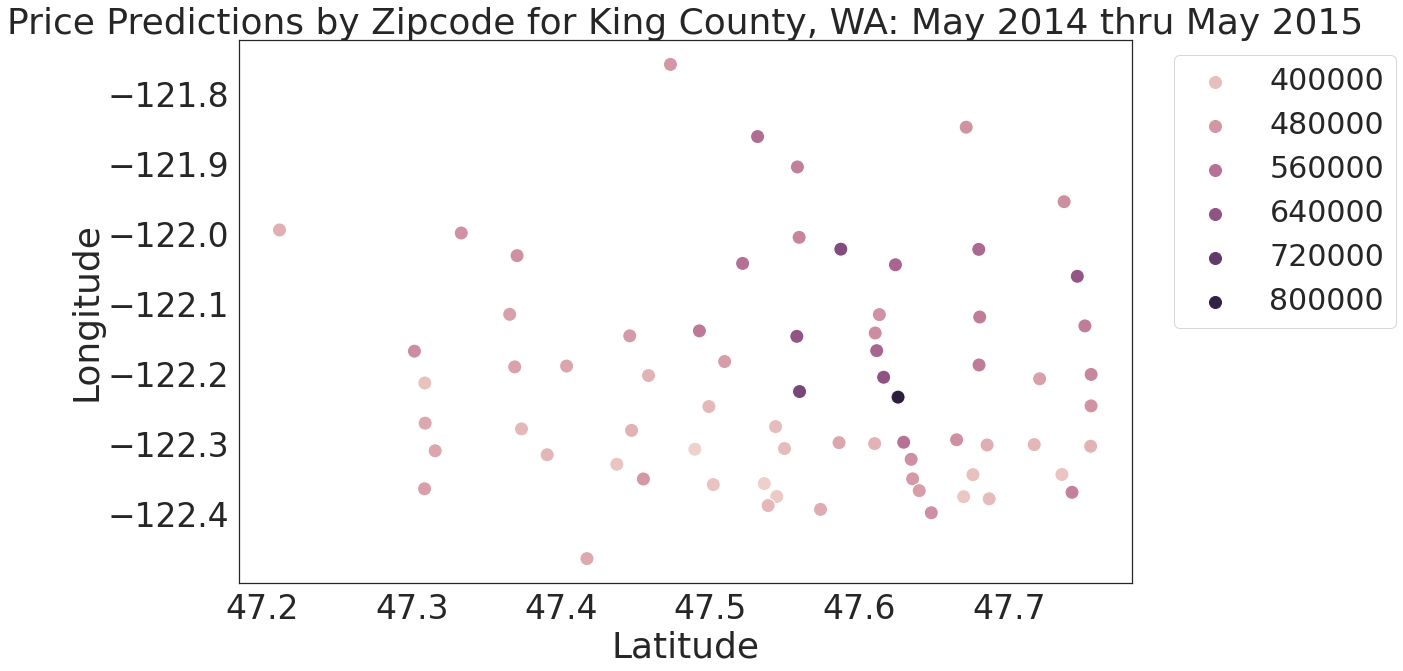

In [103]:
#Scatterplot of the Living area and Price.
Size=plt.figure()
Size.set_figwidth(16)
Size.set_figheight(10)
sns.set_style("white")

lat = lat_longs['lat']
long = lat_longs['long']
sns.scatterplot(data=price_pred_df, x=lat, y=long, hue="price_predictions", s=200)

plt.title('Price Predictions by Zipcode for King County, WA: May 2014 thru May 2015')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(bbox_to_anchor= (1.03, 1),fontsize='small', markerscale=2.,)
plt.savefig('PricePredictions_by_Zipcode.png')
plt.show()

#### Batch Gradient Descent Results
The gradient descent analysis proved to have a better accuracy than the other methods that were tried. There is a very low p-value signifying that there is a direct correlation between the predictor and dependent variables with the data being statistically significant. There is a higher R-squared value showing that it is a better fit model since the higher the r-squared, the better the fit. With this, the predictions were created for common ```bedroom```, ```sqft_living``` features to show what the prices would be based on the ```bathrooms```, ```sqft_living``` and ```grade```. The predicted prices reflect the dataset to be in the right range of what the price is expected to be from those features.

## Discussion

#### Initial Expectations of House Sale Prices
From our team's initial thought process, our assumptions was that the zipcode, bedrooms, sqft_living would have the highest correlation. Based on our own personal experiences and knowledge of the housing market especially since we all live in San Diego or San Francisco area, location changes the price no matter the condition or size of the house. When cleaning and analyzing the data, we found some interesting results where the location and bedrooms didn't play a huge role in the pricing. So we went with what the data was showing us to determine the price of house sales. 

#### Data Cleaning
Common sense versus bias

An important reason for using statistical methodology in the analysis of the data is that it protects us from personal bias. If we went with our own understanding of what features affect the house prices, our data would have been inconclusive because it wouldn't be accurate. Several questions were discussed in determining how to clean the data to not create any bias like: 
- Are the outliers large enough to affect the data overall? 
- Do we assess the information by common sense of a clear typo in the data or remove/replace it with proper cleaning methods? 

#### Types of Regression Analysis
After the standard linear regression was completed, it was clear that the summary errors and average R-squared value proves that it wouldn't give an accurate price prediction so we each tried a different regression analysis and classification to find a more accurate model. The gradient descent gave the best accuracy which is the predictive model that we went through; however, we also tried the random forest regression for both decision trees and classification. Both were performed to understand the differences between working with continuous data and also grouped into price ranges. This helped us understand that depending on the dataset and what the objective is, certain regression analysis work better than others. 

## Appendix

The appendix shows the other regression analysis that were performed and were not chosen.

##### Random Forest - Decision Tree Regression 

In [84]:
#Import Support Libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
import scipy as scpy

In [85]:
#Separate the data into a train and test dataset
train_df, test_df = train_test_split(house_clean, test_size=0.5, random_state=42, shuffle=True)

In [86]:
#Create and train the model
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(train_df[['bathrooms','grade','sqft_living']], train_df['price'])
y_predict = regressor.predict(test_df[['bathrooms','grade','sqft_living']])
y_test=train_df['price']

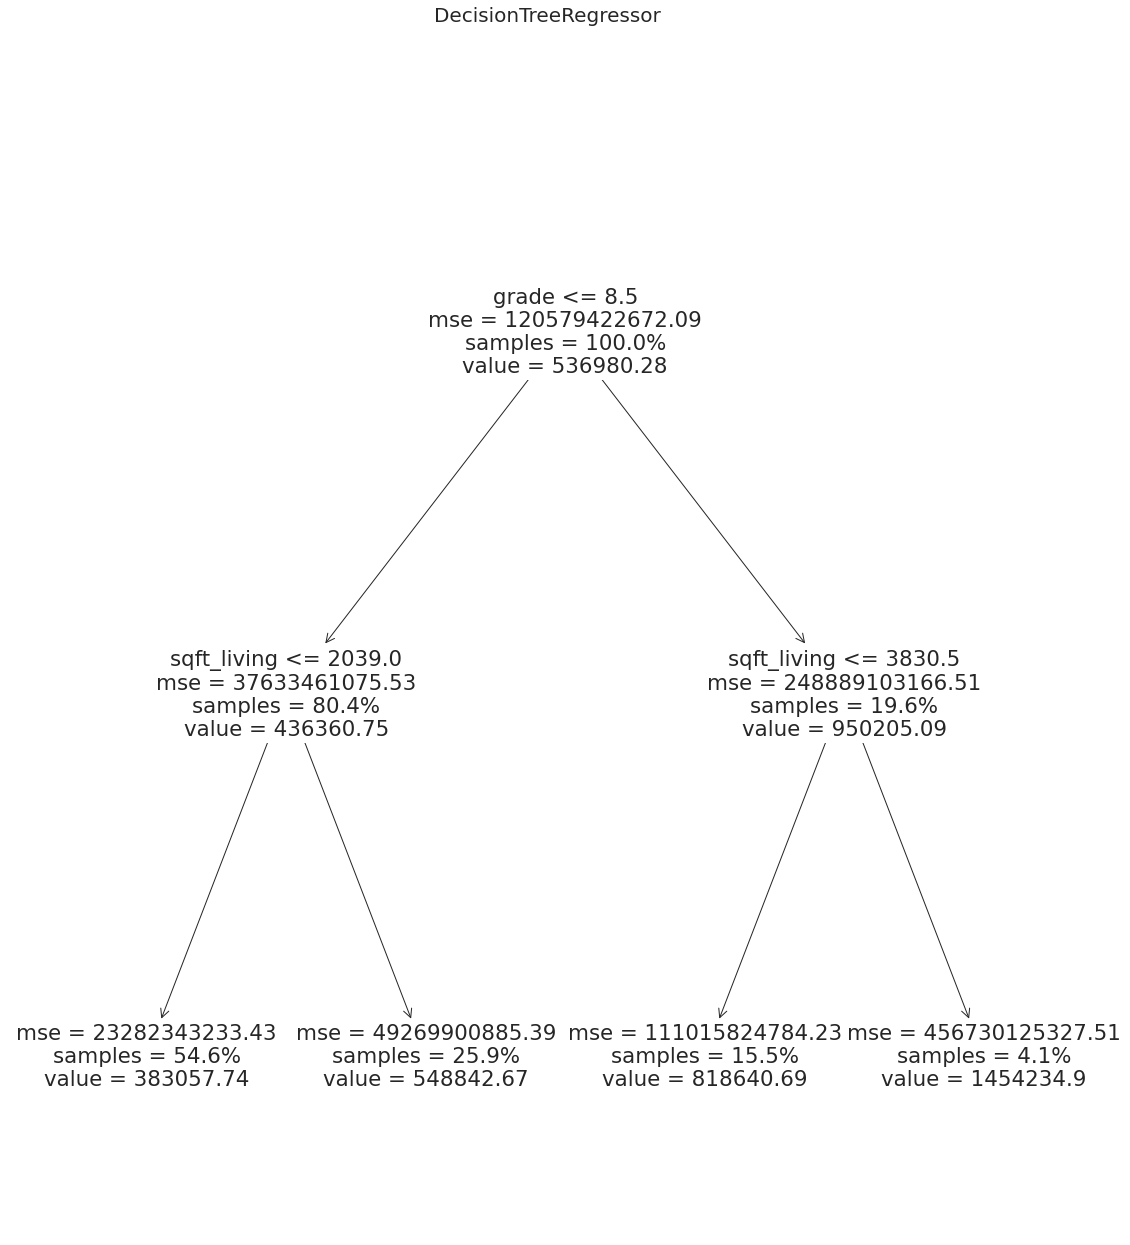

In [87]:
#Plot the Tree
plt.figure(figsize=(20,20)).suptitle("DecisionTreeRegressor", fontsize=20)
tp=tree.plot_tree(regressor, proportion=True,feature_names=['bathrooms', 'grade', 'sqft_living'], precision=2)

In [88]:
#Feature Importance
regressor.feature_importances_

array([0.        , 0.70014938, 0.29985062])

In [89]:
'''Cross Validated Metrics
Measures the accuracy of the model by separating the sample in to similar size sub-samples, 
tests, and then gives the score for the last sub-sample.'''

scores = cross_val_score(regressor,test_df[['bathrooms','grade','sqft_living']], test_df['price'],cv=5 )
np.round(scores,3)

array([0.402, 0.497, 0.373, 0.445, 0.426])

In [90]:
print("Mean squared error                : ",np.round(mean_squared_error(y_test, y_predict[:-1]),2))
print("Square root of Mean Squared Error : ",np.round(np.sqrt(mean_squared_error(y_test, y_predict[:-1])),2))
print("Mean absolute error               : ",np.round(mean_absolute_error(y_test, y_predict[:-1]),2))
print("Correlation and P Value           : ",np.round(scpy.stats.pearsonr(y_test, y_predict[:-1]),4))

Mean squared error                :  183288753835.46
Square root of Mean Squared Error :  428122.36
Mean absolute error               :  285007.31
Correlation and P Value           :  [-0.0056  0.5577]


In [91]:
#Accuracy
scores = cross_val_score(regressor,train_df[['bathrooms','grade','sqft_living']], train_df['price'],cv=5 )
print("Accuracy: %0.2f +/- %0.2f" % (scores.mean(),scores.std()*2))

Accuracy: 0.49 +/- 0.03


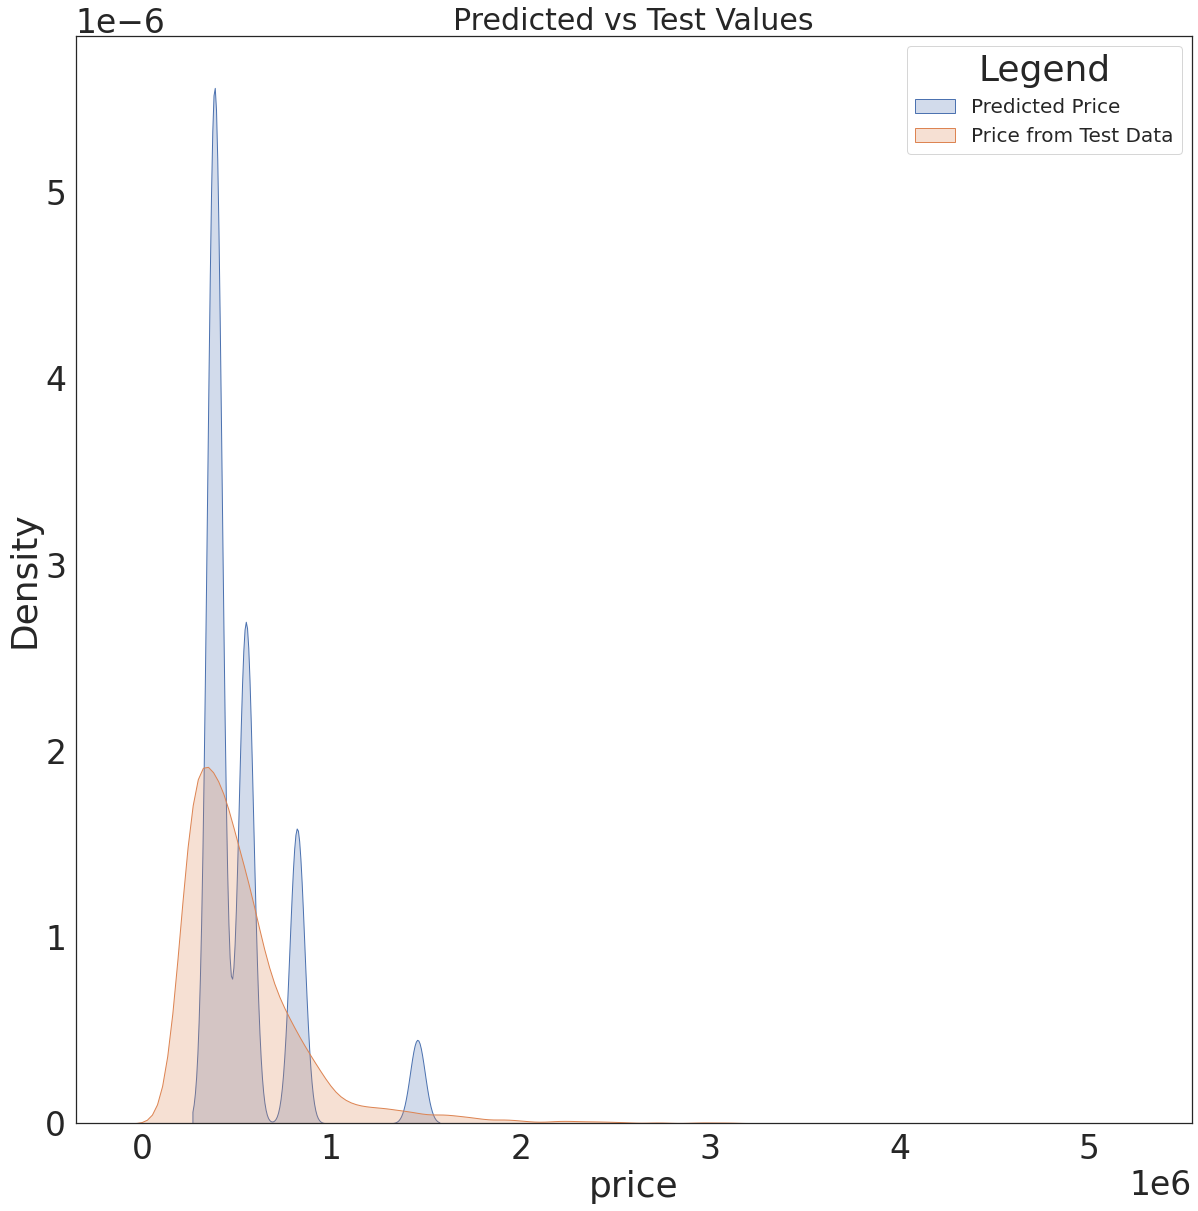

In [92]:
#Plot predicted vs actual values
y_train = train_df['price']
sns.set_context("notebook" , font_scale=3)
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title("Predicted vs Test Values", fontsize=30)
sns.kdeplot(y_predict, ax=ax, fill = True)
sns.kdeplot(y_test, ax=ax, fill = True)
ax.legend(["Predicted Price", "Price from Test Data"],title="Legend", fontsize=20)

#ax.set_xlabel('X_axis',fontsize=20);
#ax.set_ylabel('Y_axis',fontsize=20);

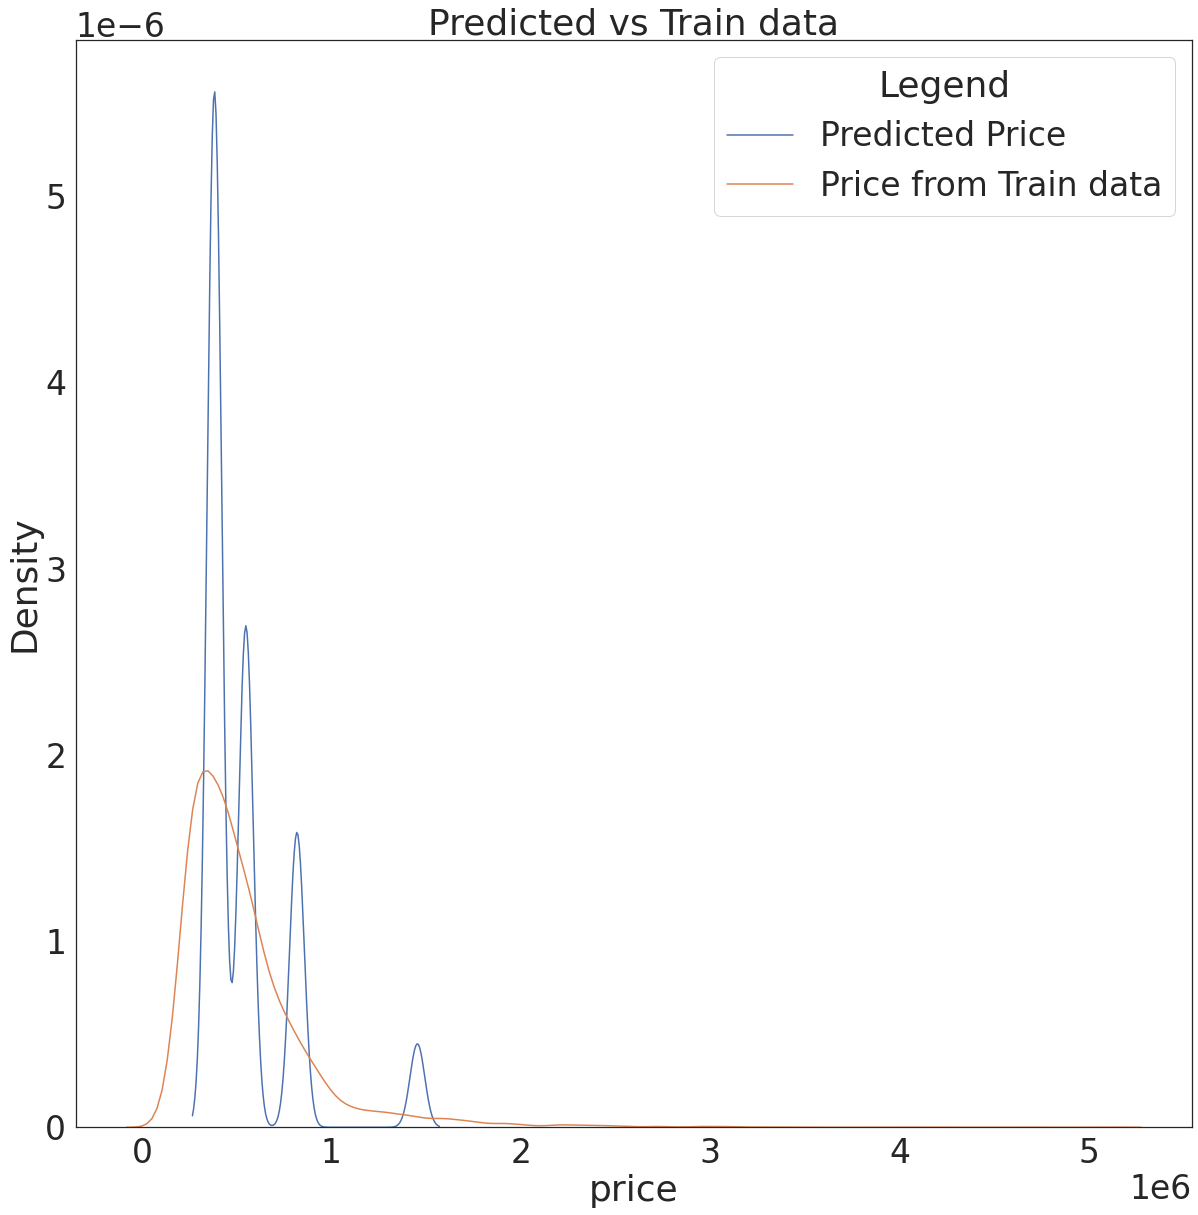

In [93]:
#Predicted vs Train Price Values
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title("Predicted vs Train data")
sns.kdeplot(y_predict, ax=ax)
sns.kdeplot(y_train, ax=ax)
ax.legend(["Predicted Price", "Price from Train data"],title="Legend")

#### Random Forest- Classifier

In [94]:
#Categorize the data

def clasifier(row):
    if row['price'] <= 75000:
        return "0-75000"
    elif row['price'] > 75000 and row['price'] <= 321950:
        return "75000-321950"
    elif row['price'] > 321950 and row['price'] <= 450000:
        return "321950-450000"
    elif row['price'] > 450000 and row['price'] <= 645000:
        return "450000-645000"
    elif row['price'] > 645000 and row['price'] <= 750000:
        return "645000-750000"
    elif row['price'] > 750000 and row['price'] <= 850000:
        return "750000-850000"
    elif row['price'] > 850000 and row['price'] <= 950000:
        return "850000-950000"
    elif row['price'] > 950000 and row['price'] <= 1500000:
        return "950000-1500000"
    elif row['price'] > 1500000 and row['price'] <= 2000000:
        return "1500000-2000000"
    elif row['price'] > 2000000 and row['price'] <= 2500000:
        return "2000000-2500000"
    elif row['price'] > 2500000 and row['price'] <= 3000000:
        return "2500000-3000000"
    elif row['price'] > 3000000 and row['price'] <= 3500000:
        return "3000000-3500000"
    elif row['price'] > 3500000 and row['price'] <= 4000000:
        return "3500000-4000000"
    elif row['price'] > 4000000 and row['price'] <= 4500000:
        return "4000000-4500000"
    elif row['price'] > 4500000 and row['price'] <= 5000000:
        return "4500000-5000000"
    elif row['price'] > 5000000 and row['price'] <= 6000000:
        return "5000000-6000000"
    elif row['price'] > 6000000 and row['price'] <= 7000000:
        return "6000000-7000000"
    elif row['price'] > 7000000 and row['price'] <= 8000000:
        return "7000000-8000000"
    elif row['price'] > 8000000 and row['price'] <= 9000000:
        return "8000000-9000000"
    elif row['price'] > 9000000 and row['price'] <= 10000000:
        return "9000000-10000000"
    else:
        return ">10000000"

In [95]:
def clasifier_int(row):
    if row['price'] <= 75000:
        return 1
    elif row['price'] > 75000 and row['price'] <= 321950:
        return 2
    elif row['price'] > 321950 and row['price'] <= 450000:
        return 3
    elif row['price'] > 450000 and row['price'] <= 645000:
        return 4
    elif row['price'] > 645000 and row['price'] <= 750000:
        return 5
    elif row['price'] > 750000 and row['price'] <= 850000:
        return 6
    elif row['price'] > 850000 and row['price'] <= 950000:
        return 7
    elif row['price'] > 950000 and row['price'] <= 1500000:
        return 8
    elif row['price'] > 1500000 and row['price'] <= 2000000:
        return 9
    elif row['price'] > 2000000 and row['price'] <= 2500000:
        return 10
    elif row['price'] > 2500000 and row['price'] <= 3000000:
        return 11
    elif row['price'] > 3000000 and row['price'] <= 3500000:
        return 12
    elif row['price'] > 3500000 and row['price'] <= 4000000:
        return 13
    elif row['price'] > 4000000 and row['price'] <= 4500000:
        return 14
    elif row['price'] > 4500000 and row['price'] <= 5000000:
        return 15
    elif row['price'] > 5000000 and row['price'] <= 6000000:
        return 16
    elif row['price'] > 6000000 and row['price'] <= 7000000:
        return 17
    elif row['price'] > 7000000 and row['price'] <= 8000000:
        return 18
    elif row['price'] > 8000000 and row['price'] <= 9000000:
        return 19
    elif row['price'] > 9000000 and row['price'] <= 10000000:
        return 20
    else:
        return 21

In [96]:
house_clean["price_range_int"] = house_clean.apply(clasifier_int, axis=1)
house_clean["price_range"] = house_clean.apply(clasifier, axis=1)

In [97]:
#Create a subset of the data for training and testing another model

train_df, test_df = train_test_split(house_clean, test_size=0.2, random_state=42, shuffle=True)
X = train_df[['bathrooms', 'grade', 'sqft_living']]
Y = train_df['price_range_int']
Xt = test_df[['bathrooms', 'grade', 'sqft_living']]
Yt = test_df['price_range_int']

#Create and train the classifier

classifierTree = DecisionTreeClassifier()
classifierTree = classifierTree.fit(X, Y)
Yp = classifierTree.predict(Xt)

Accuracy: 0.72 +/- 0.03


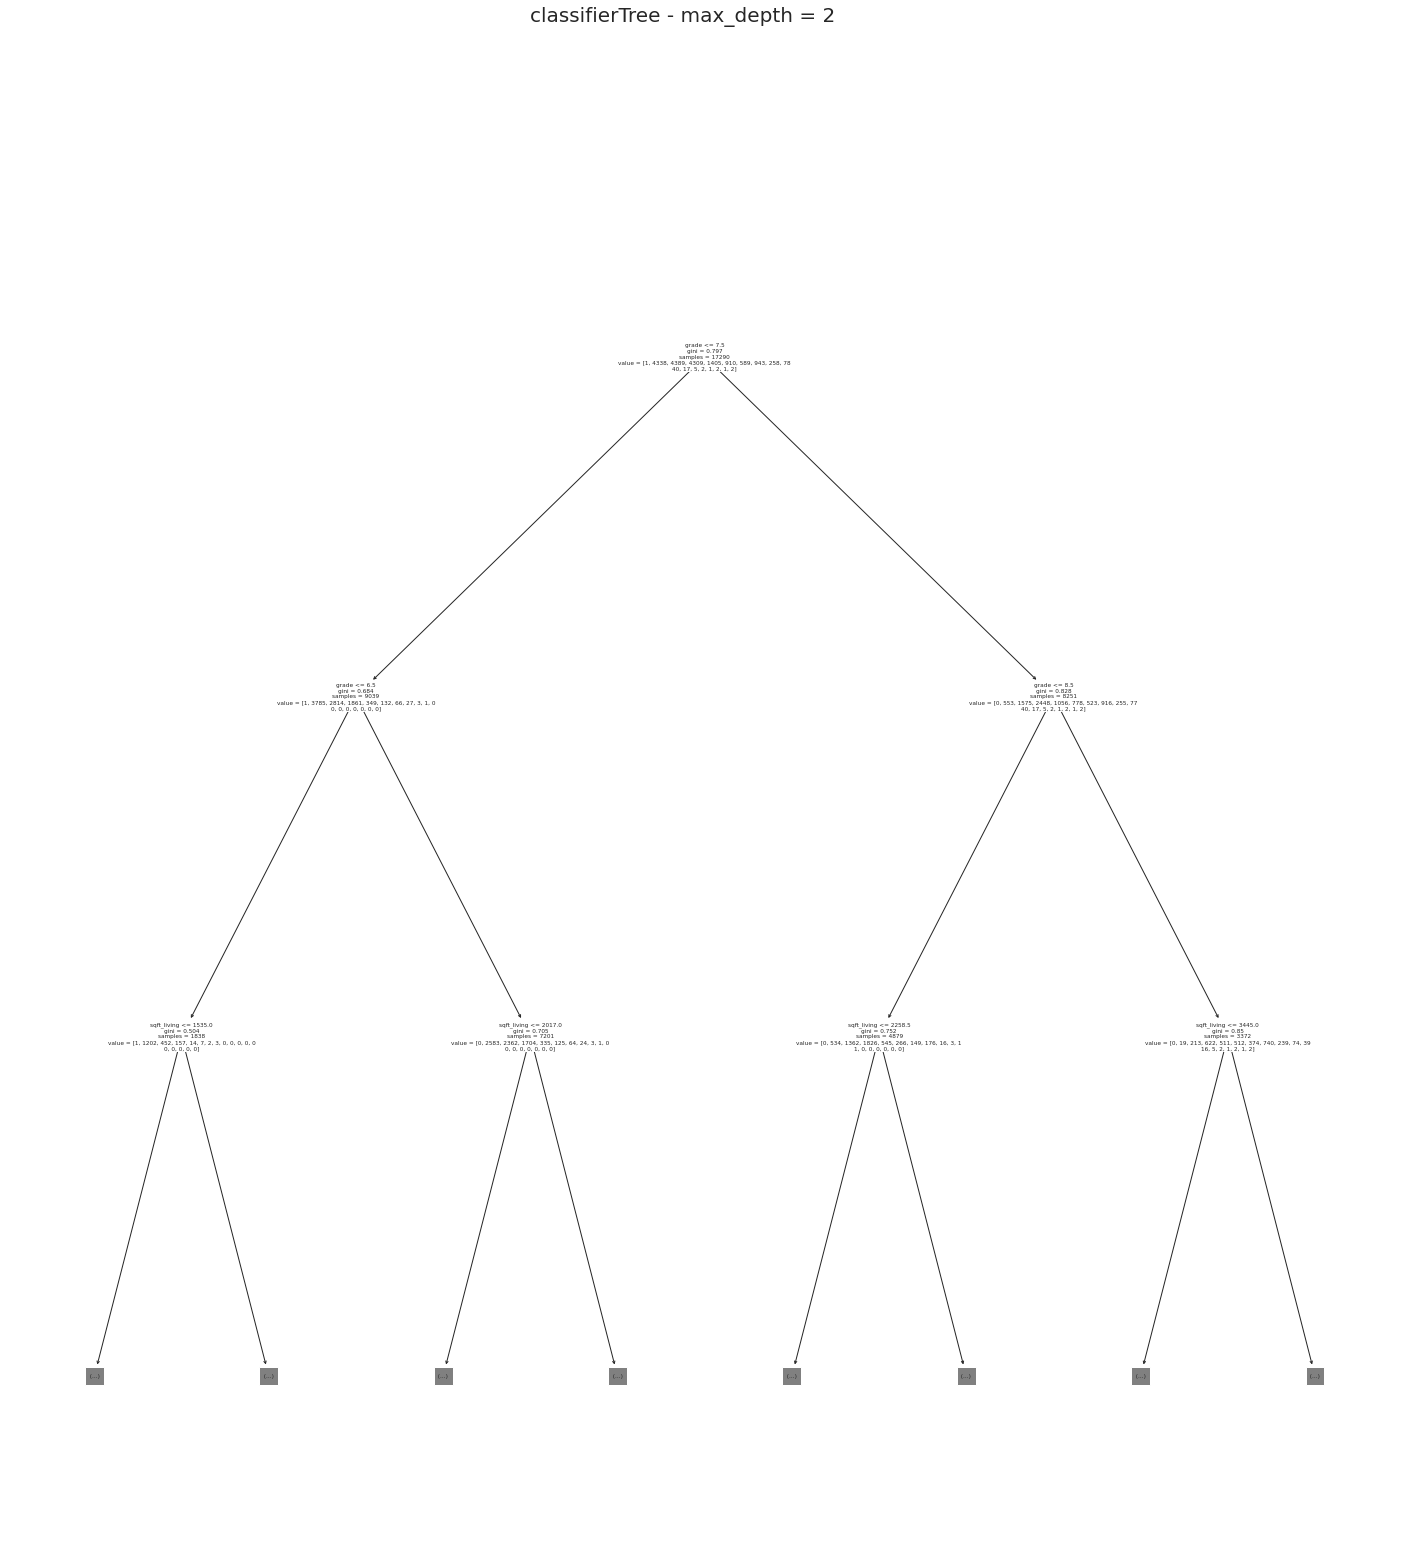

In [98]:
#Metrics

classifierTree.predict_proba(Xt)
np.round(accuracy_score(Yt,Yp),3)

#Cross Validation Report

scores = cross_val_score(classifierTree, Xt, Yp,cv=5 )
print("Accuracy: %0.2f +/- %0.2f" % (scores.mean(),scores.std()*2))

#Plot the Forest
#Only showing two levels for easier visibility

plt.figure(figsize=(25,25)).suptitle("classifierTree - max_depth = 2", fontsize=20)
tplot = tree.plot_tree(classifierTree, feature_names=['bathrooms', 'grade', 'sqft_living'],max_depth=2)
plt.show()

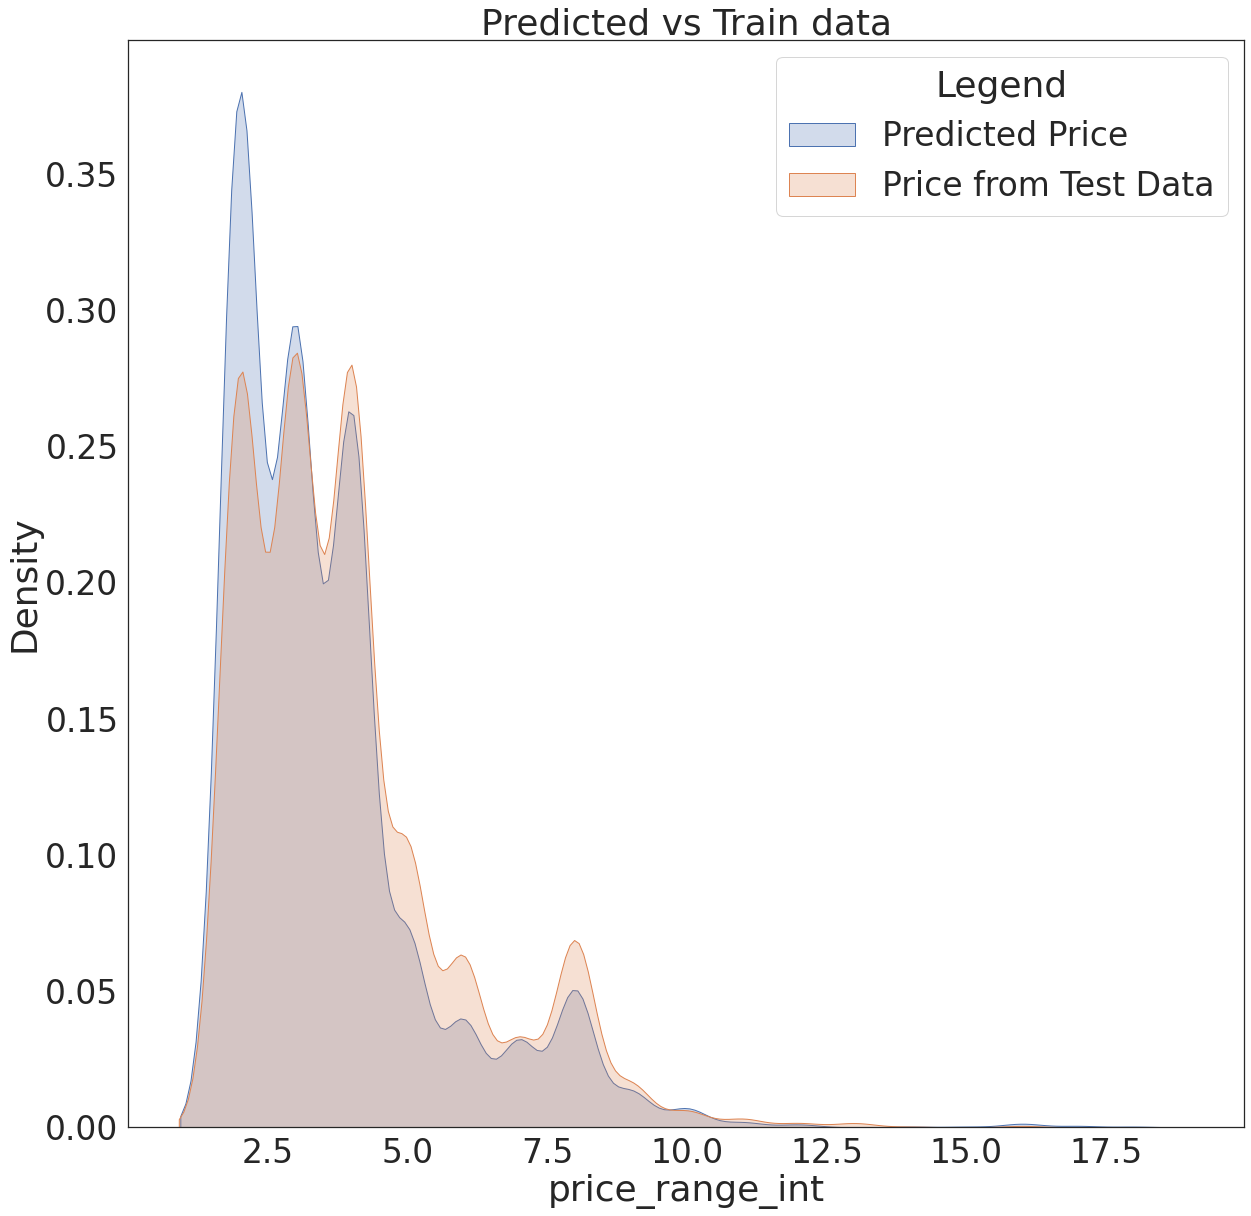

In [99]:
#Plot predicted vs actual values
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title("Predicted vs Train data")
sns.kdeplot(Yp, ax=ax, fill = True)
sns.kdeplot(Yt, ax=ax, fill = True)
ax.legend(["Predicted Price", "Price from Test Data"],title="Legend")

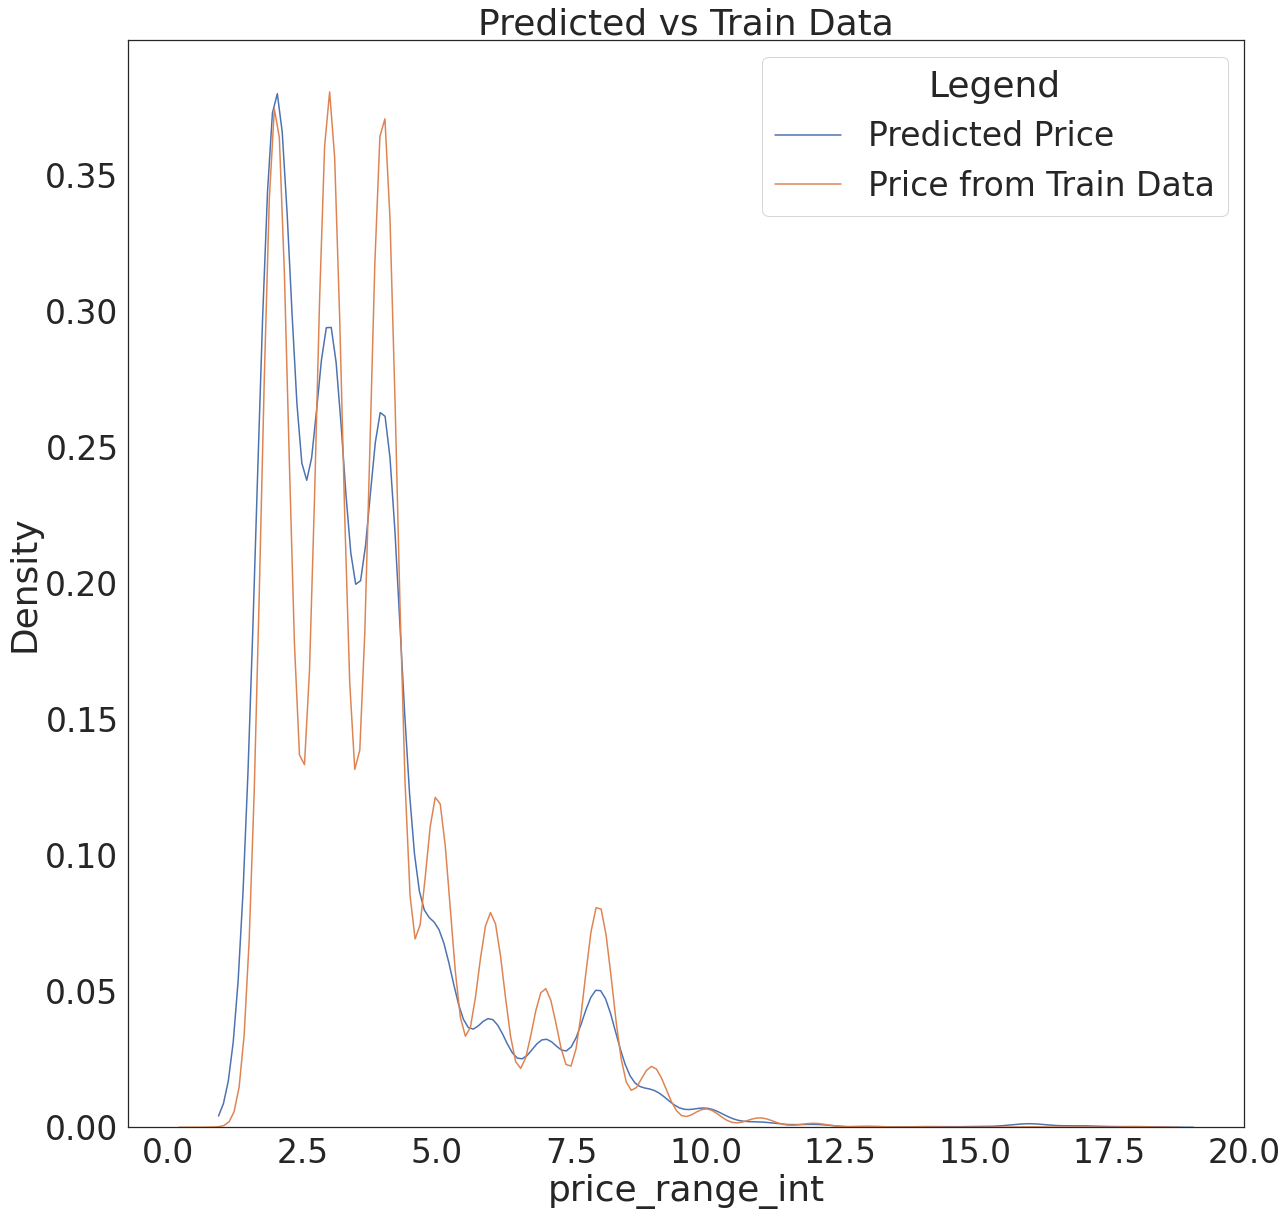

In [100]:
#Plot predicted vs train price values
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title("Predicted vs Train Data")
sns.kdeplot(Yp, ax=ax)
sns.kdeplot(Y, ax=ax)
ax.legend(["Predicted Price", "Price from Train Data"],title="Legend")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c95a11ee-936a-4d22-af3c-5a4f882f63b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>